In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Reading in the data from file
data=pd.read_csv('/content/drive/MyDrive/Project files/creditcard.csv')

Mounted at /content/drive


In [3]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
# Univariate Analysis

In [ ]:
def Univariate(data, cols):
    fig, ax= plt.subplots(nrows= 3, ncols=3, figsize= (21, 3*4)) #int(np.ceil(len(cols)/3))
    
    for j,i in enumerate(cols):
        row=int(j/3)
        col=int(j%3)
        sns.kdeplot(data[i], shade=True, ax=ax[row, col])

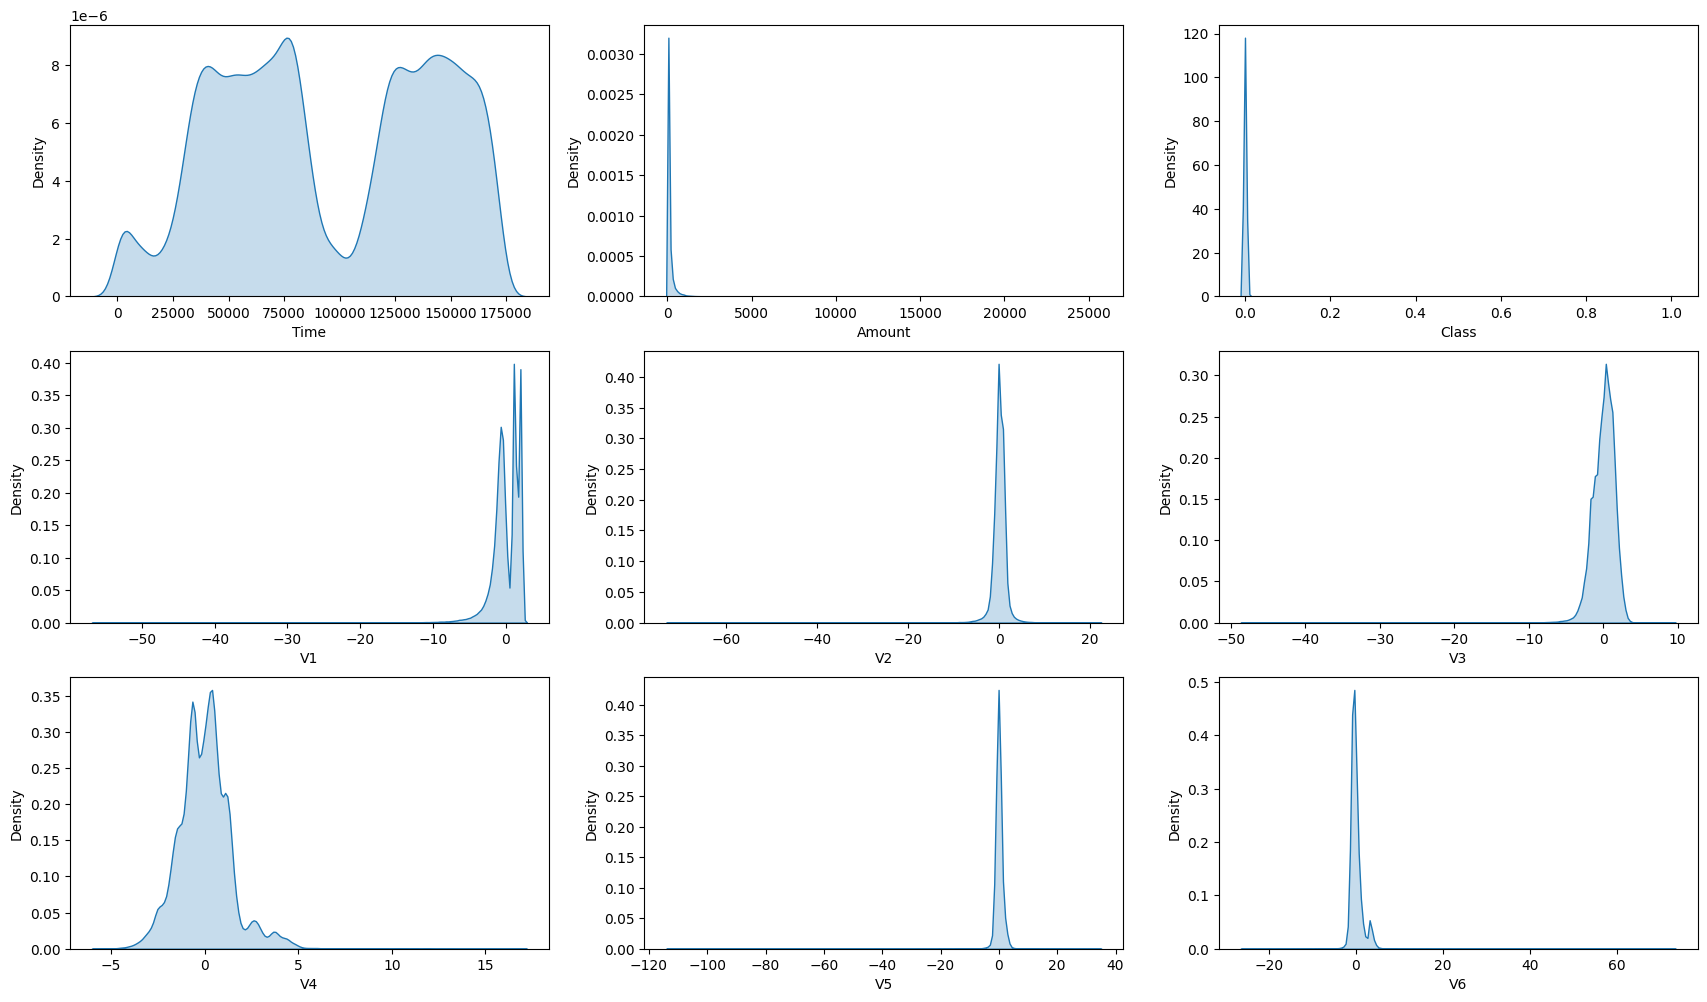

In [ ]:
Univariate(data, ['Time', 'Amount', 'Class','V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

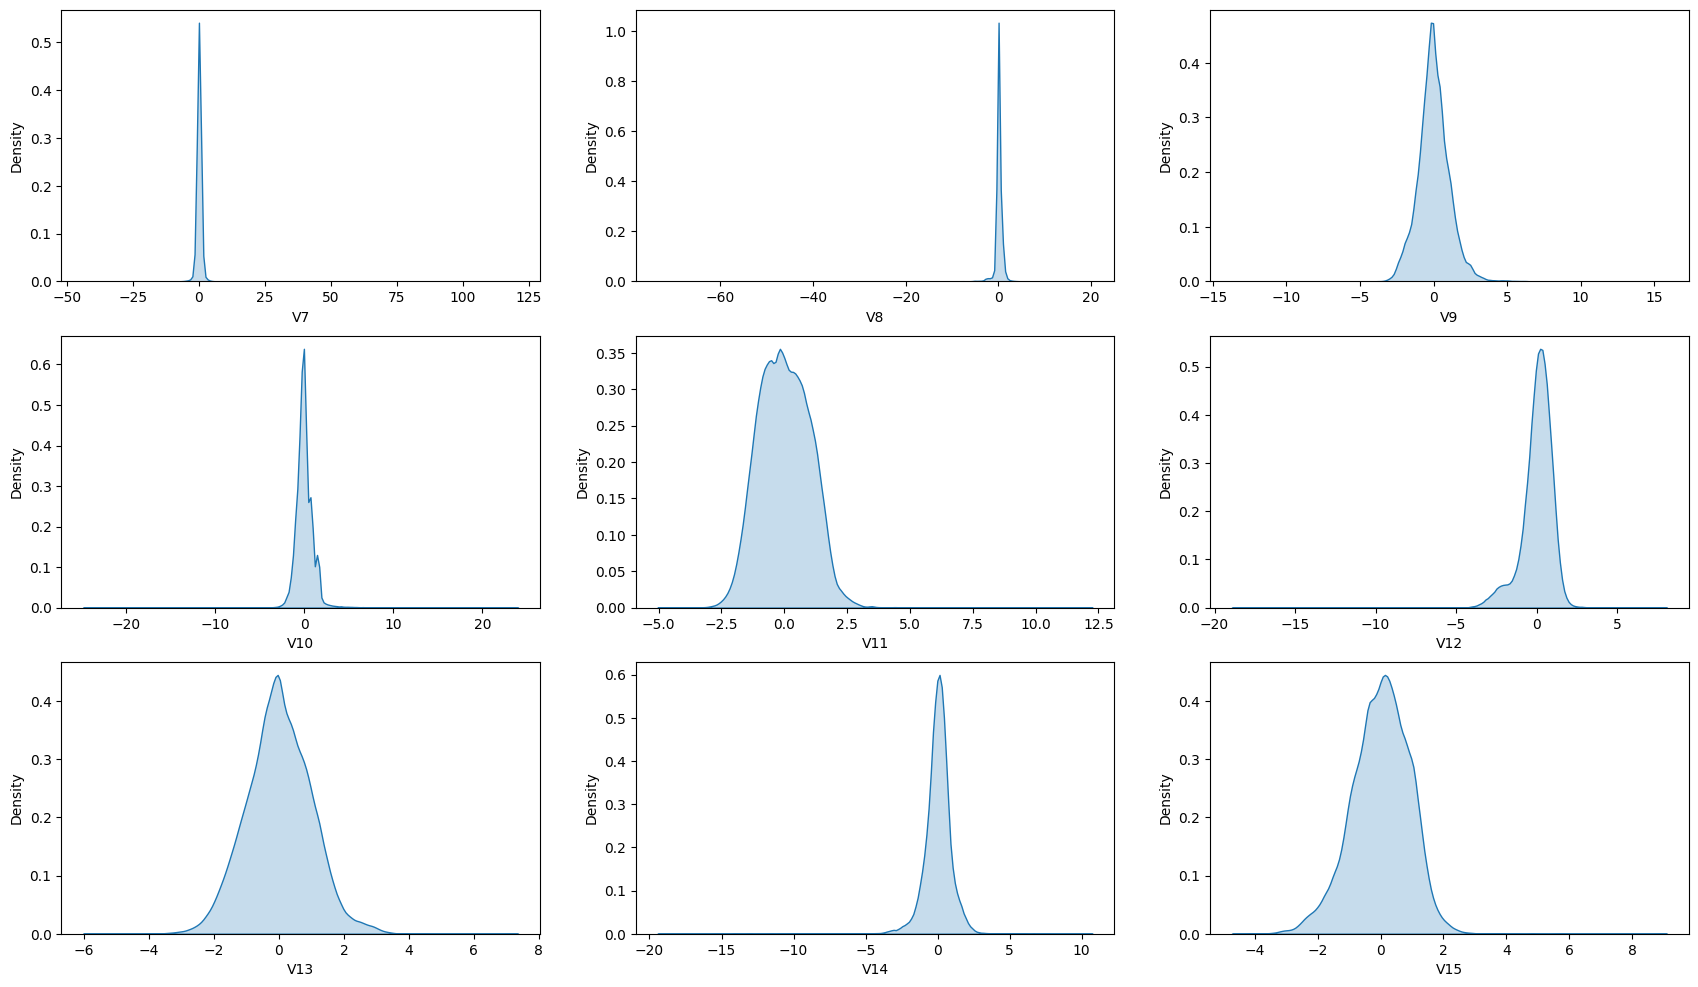

In [ ]:
Univariate(data, ['V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15'])

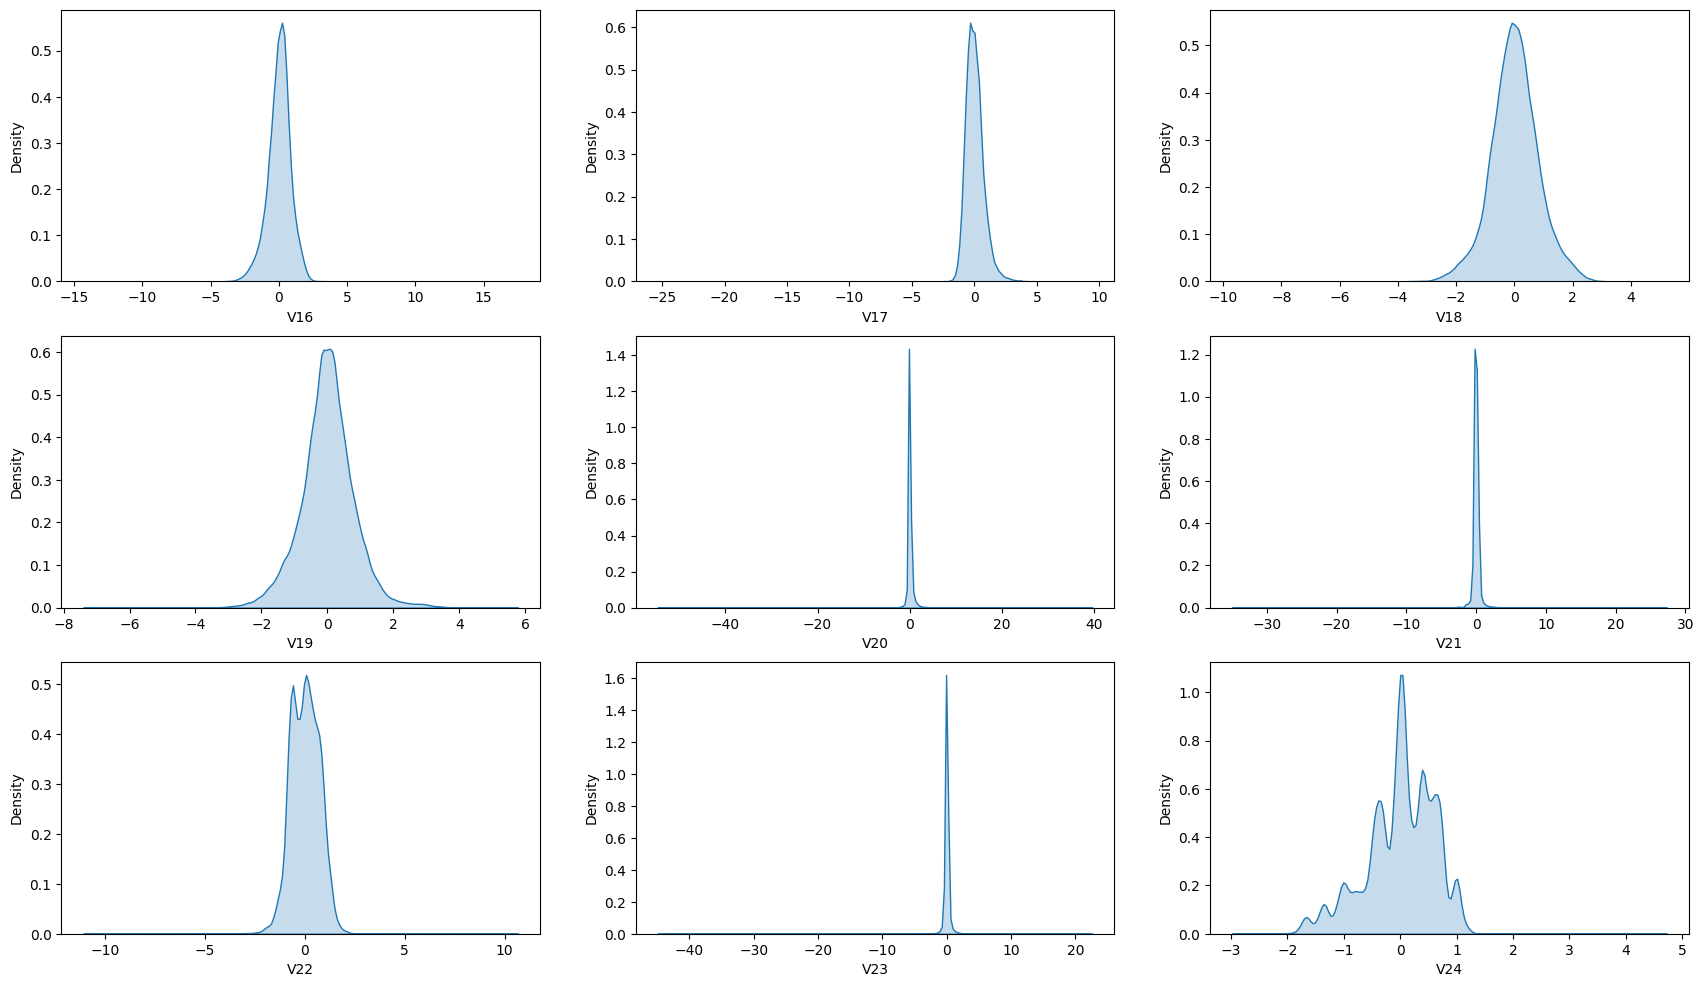

In [ ]:
Univariate(data, ['V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24'])

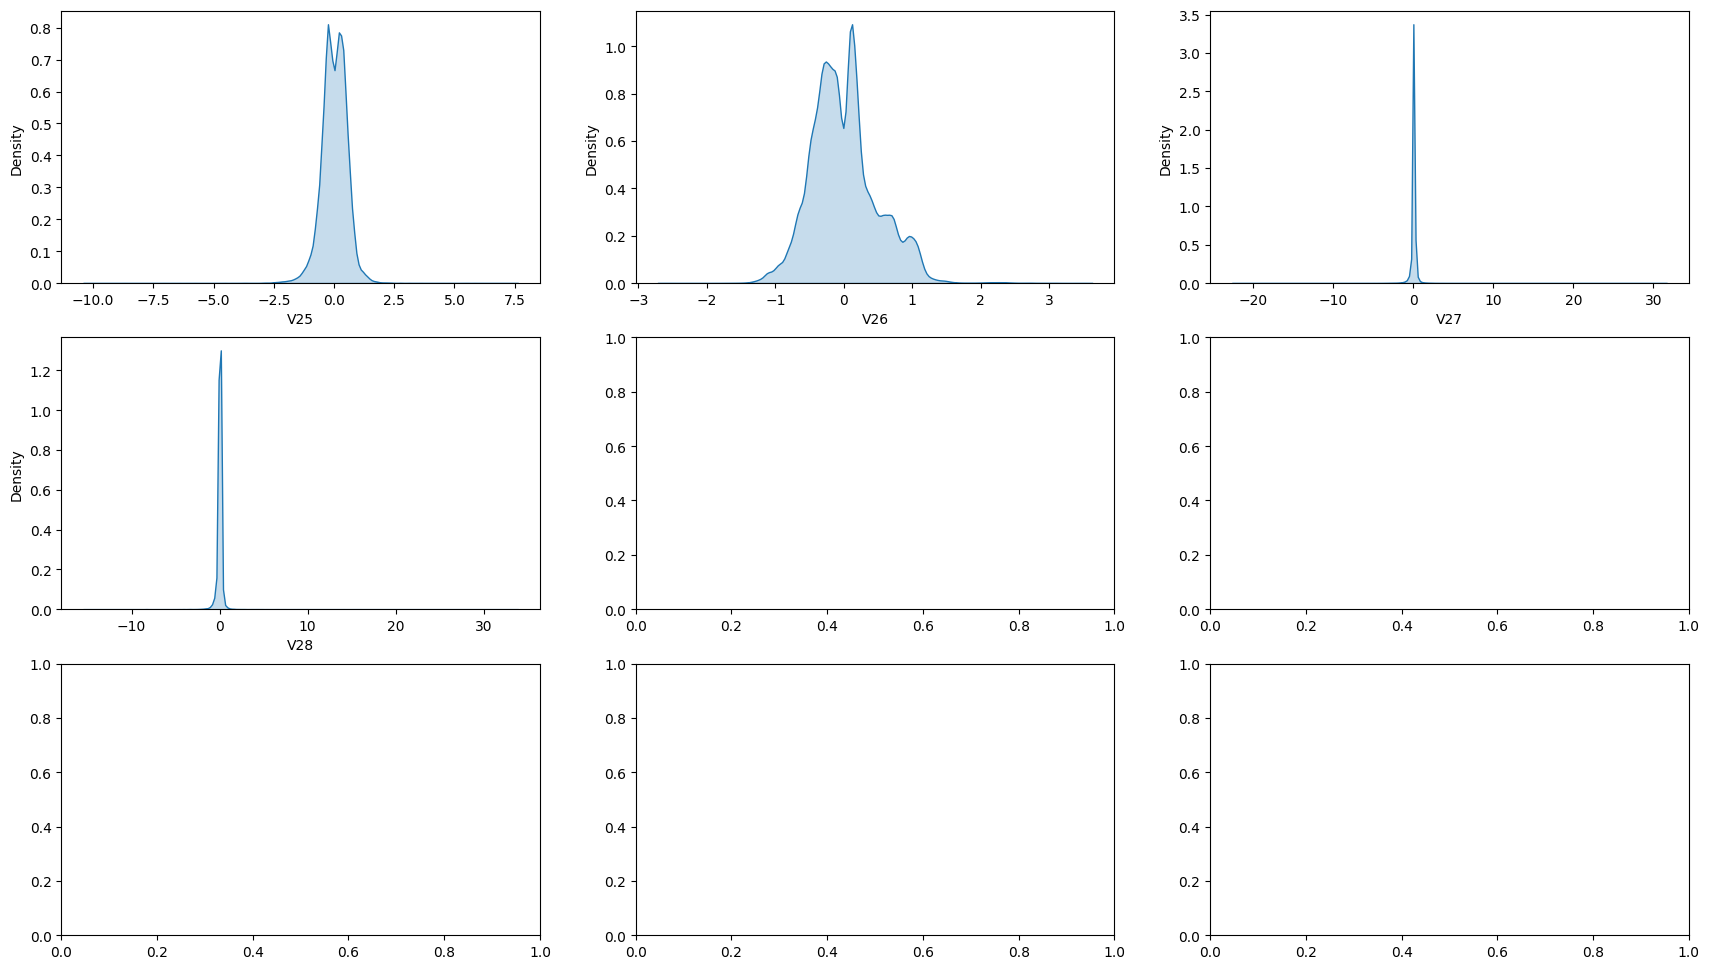

In [ ]:
Univariate(data, ['V25', 'V26', 'V27', 'V28'])

In [ ]:
# As we can see, all the variables V1-V28 have been PCA'd and normalised, but there are still many outliers. Amount also has huge outliers.
# Worth looking into whether the outliers contribute to the fraud cases

In [ ]:
# Bivariate Analysis

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [ ]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [ ]:
def Bivariate_with_mean(data, cont, target, category):
    x1=data[cont][data[target]==category][:]
    x2=data[cont][~(data[target]==category)][:]
    
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()
    
    t_p_val= TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val= TwoSampZ(m1, m2, std1, std2, n1, n2)
    
    table=pd.pivot_table(data=data, columns= target, values=cont, aggfunc='mean')
    
    plt.figure(figsize=(15,3))
    
    plt.subplot(1,2,1)
    sns.barplot(x=[str(category), 'not {}'.format(category)], y=[m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(target)
    plt.title('t-test pval= {} \nz-test pval= {} \n{}'.format(t_p_val, z_p_val, table), fontsize=10)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=target, y=cont)

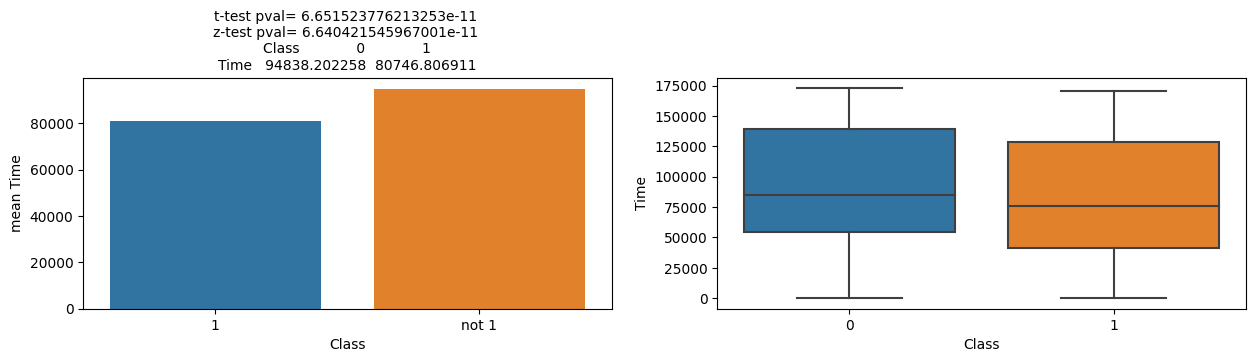

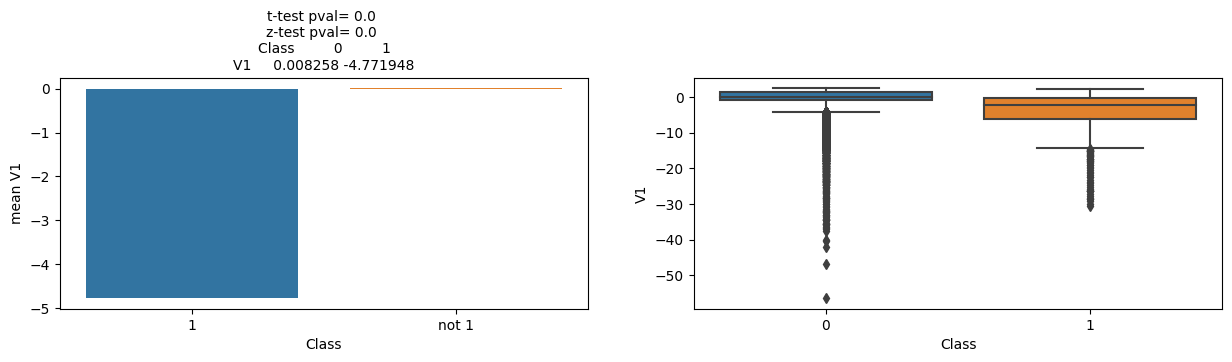

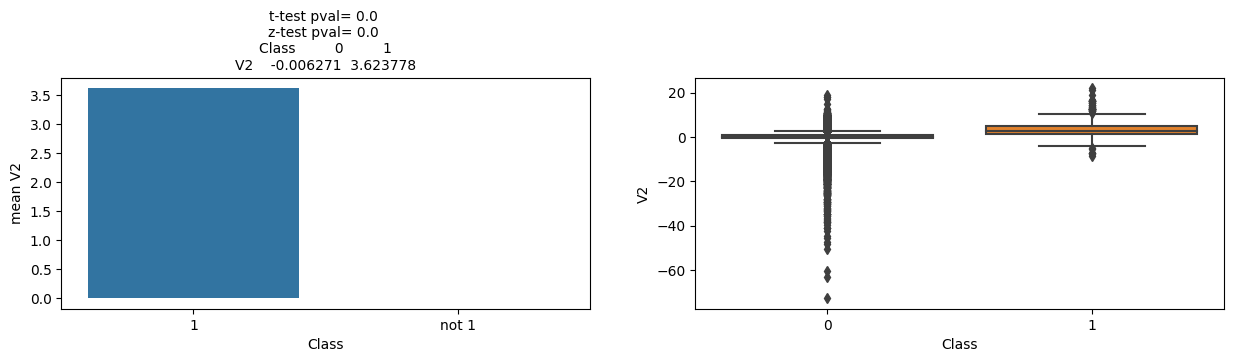

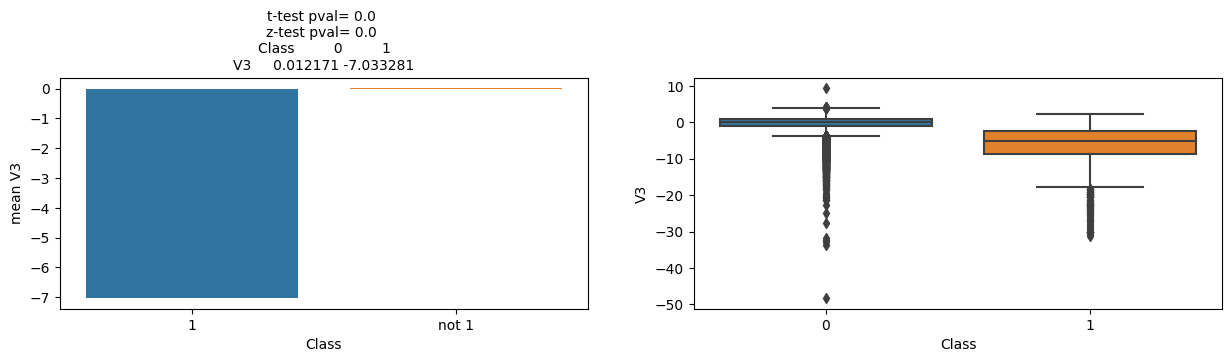

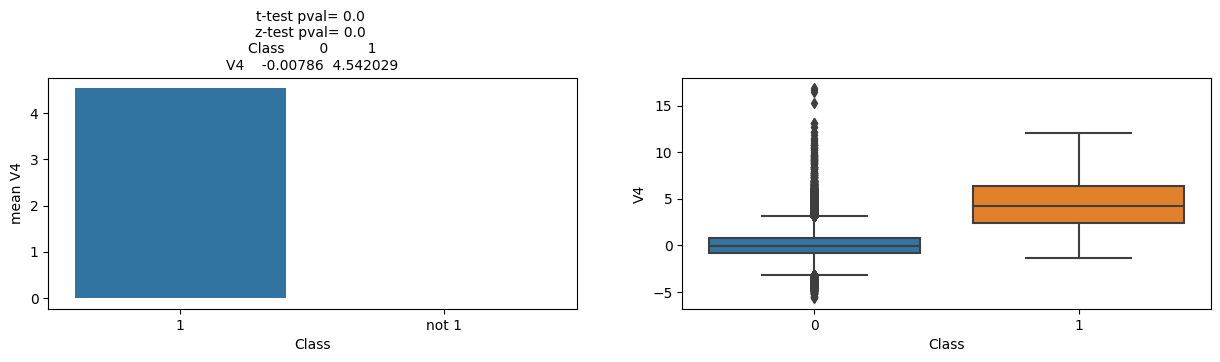

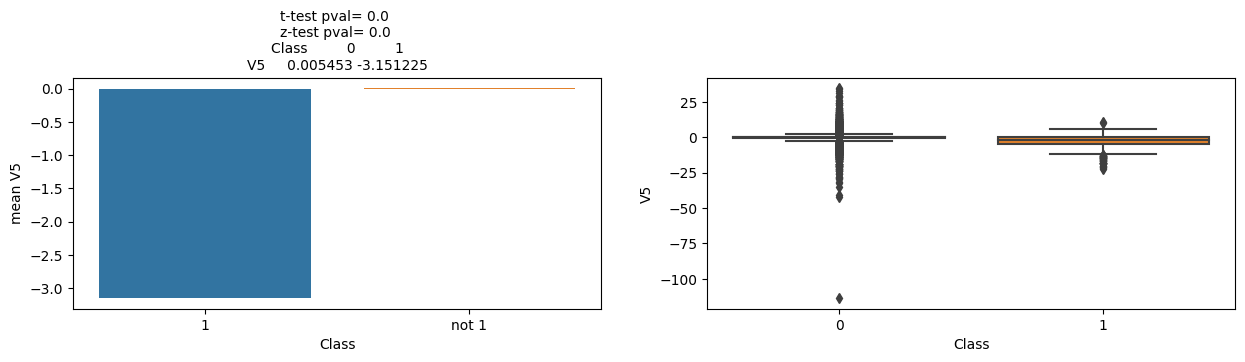

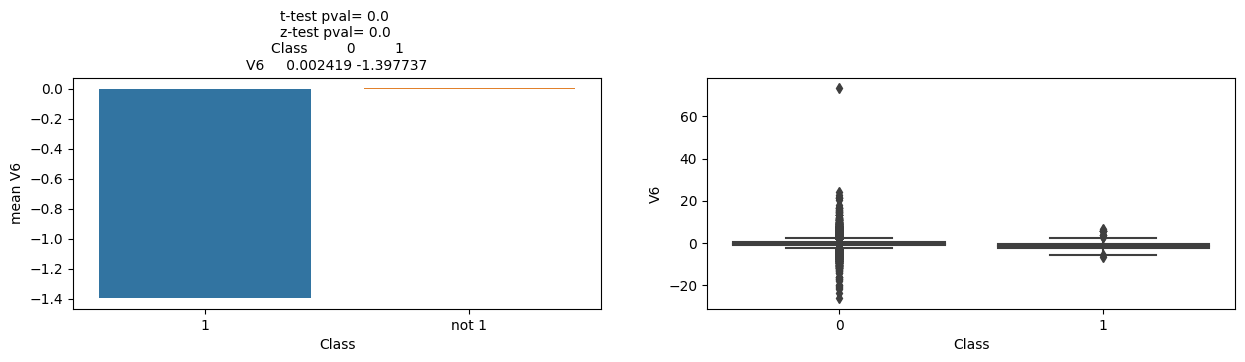

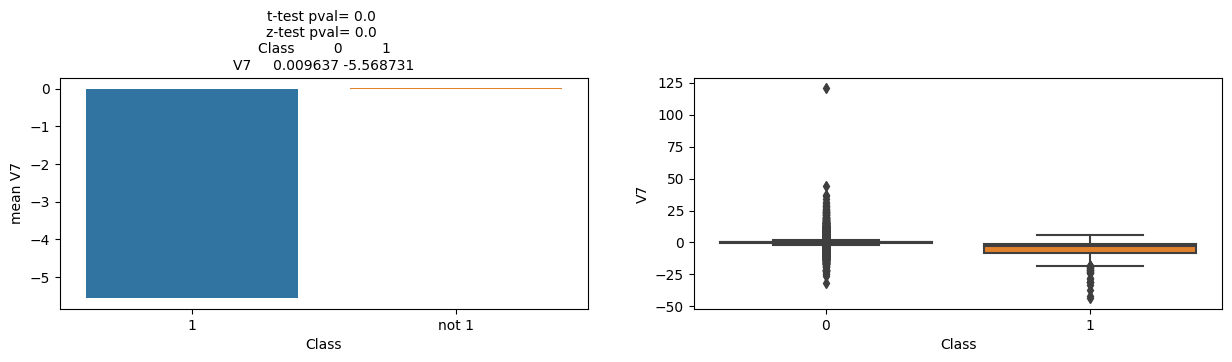

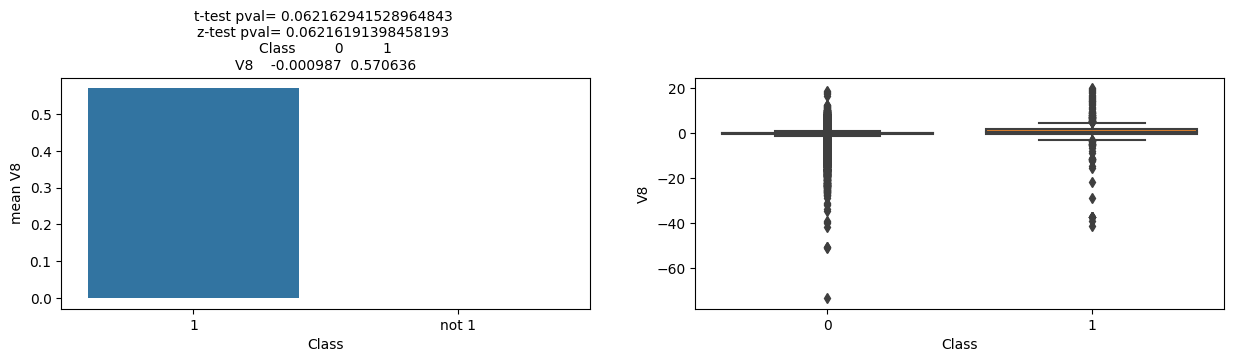

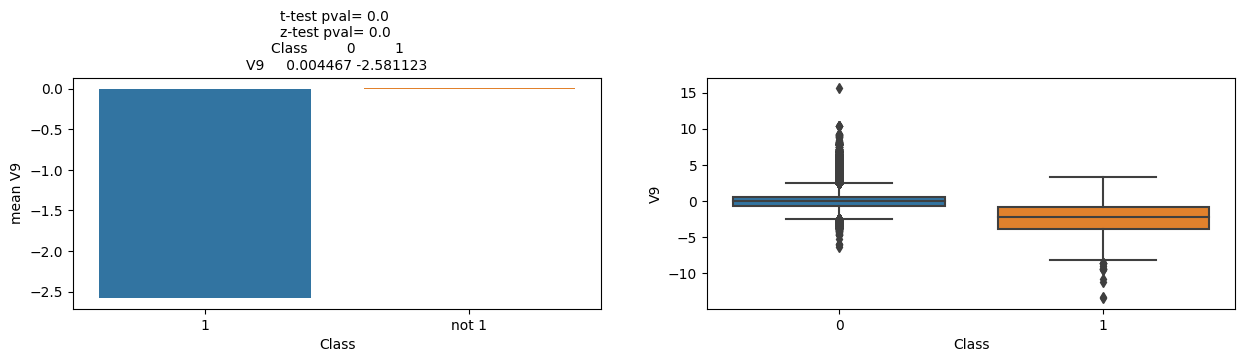

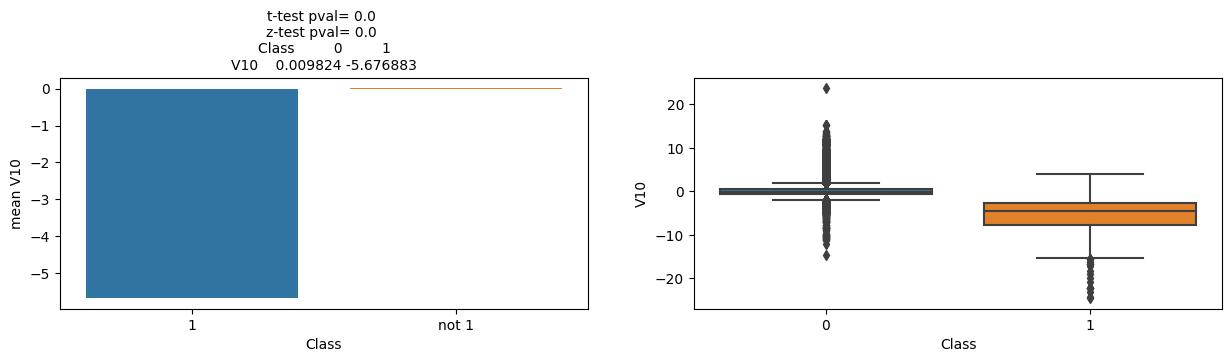

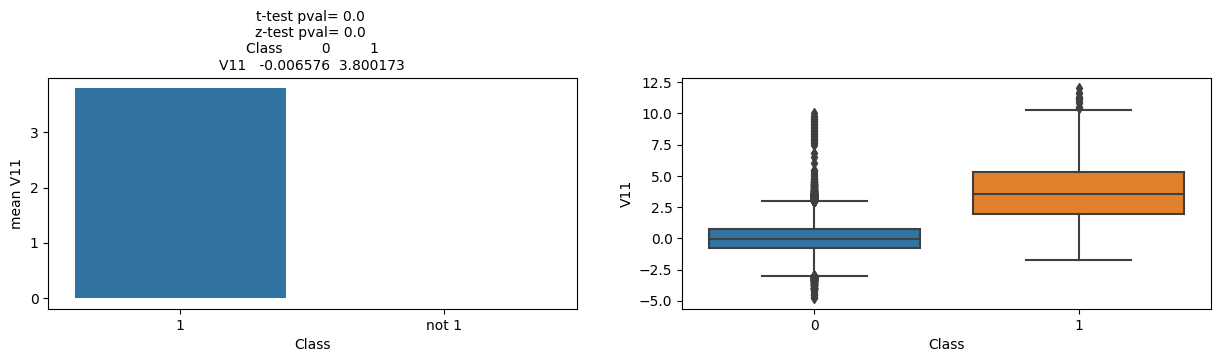

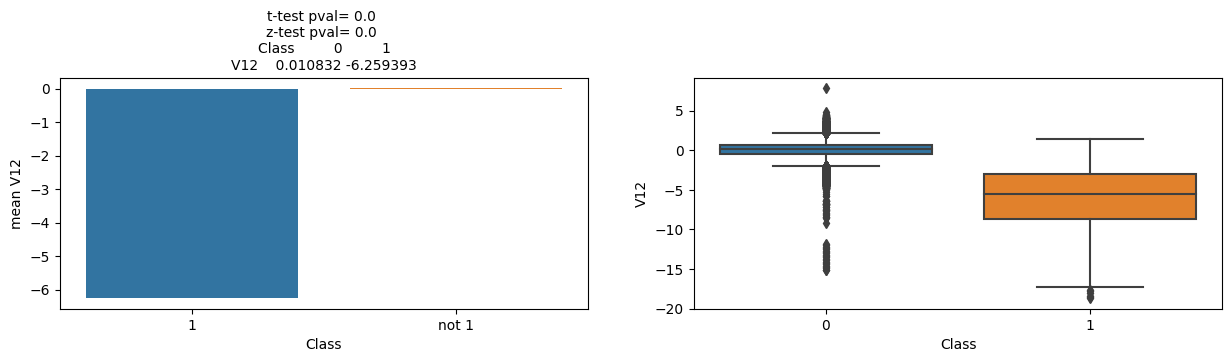

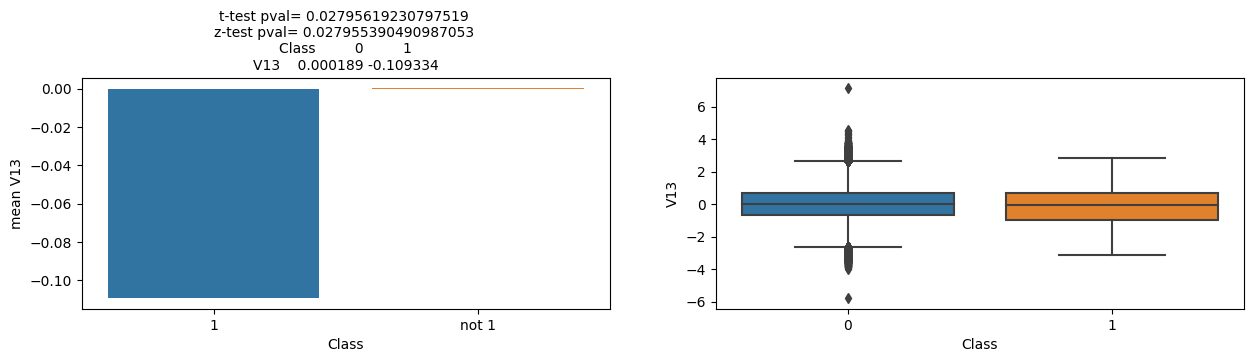

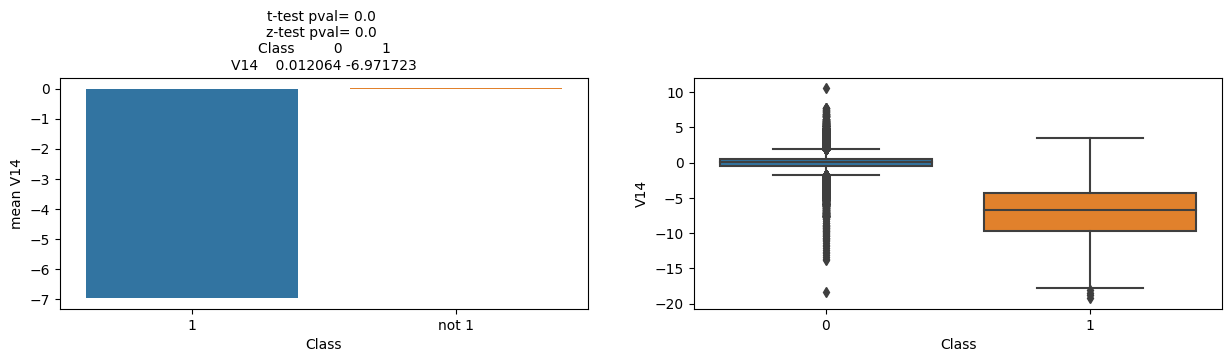

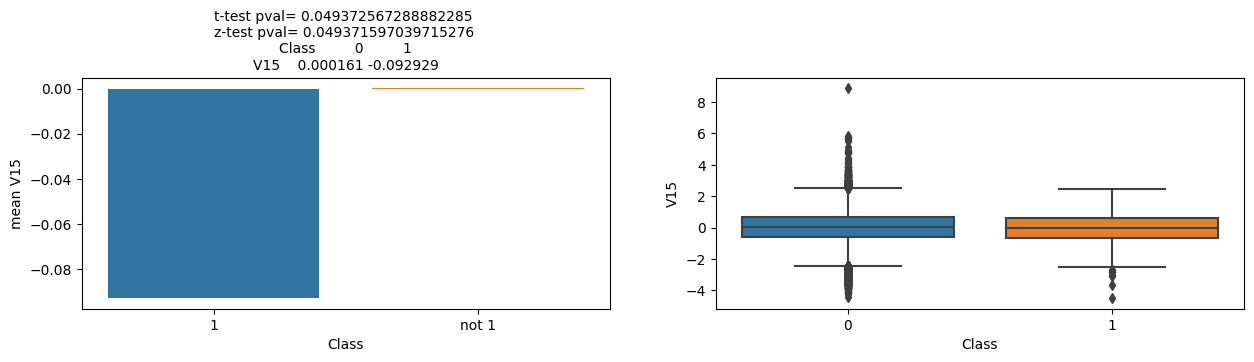

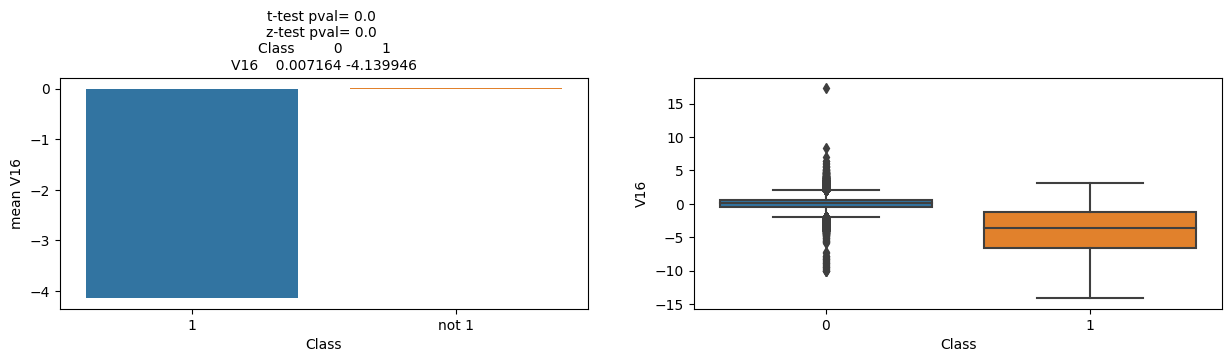

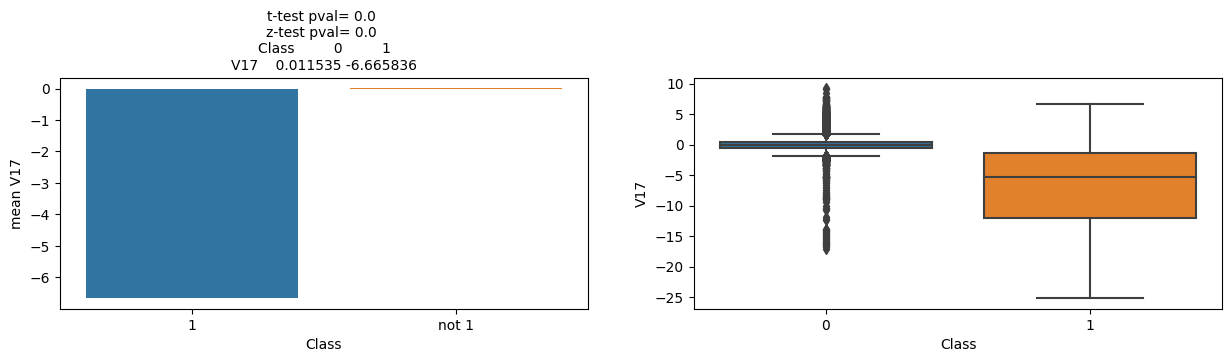

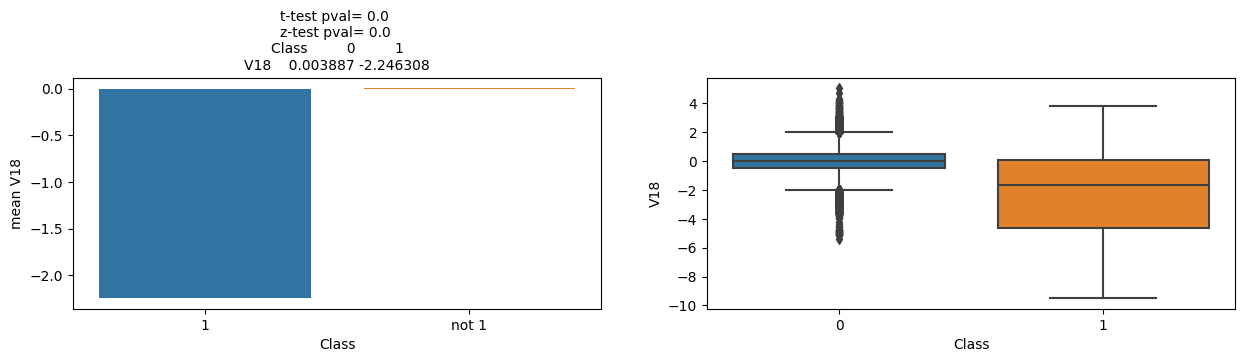

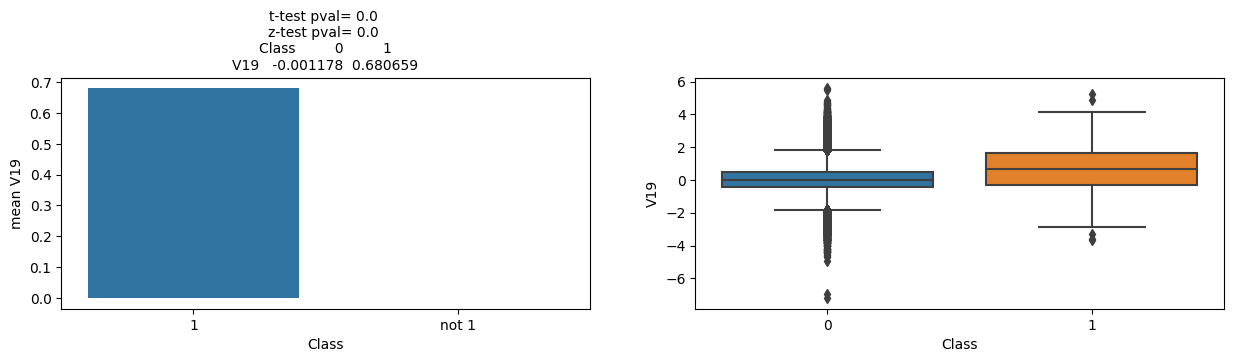

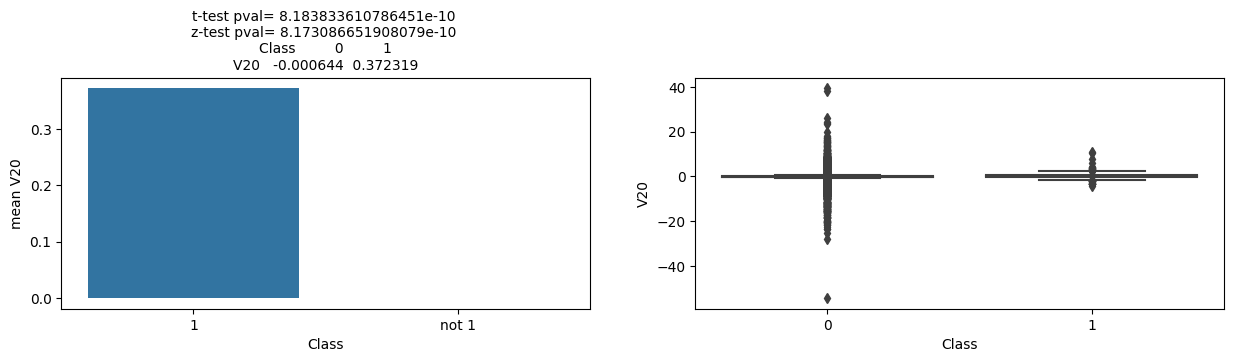

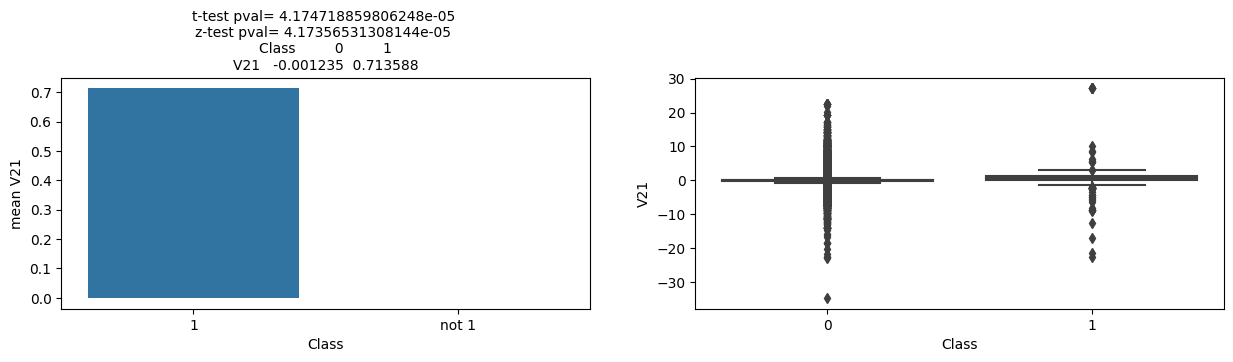

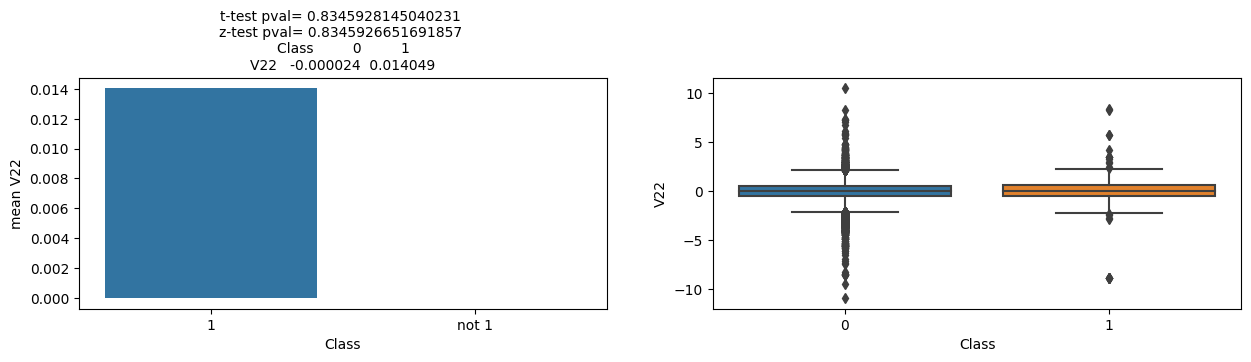

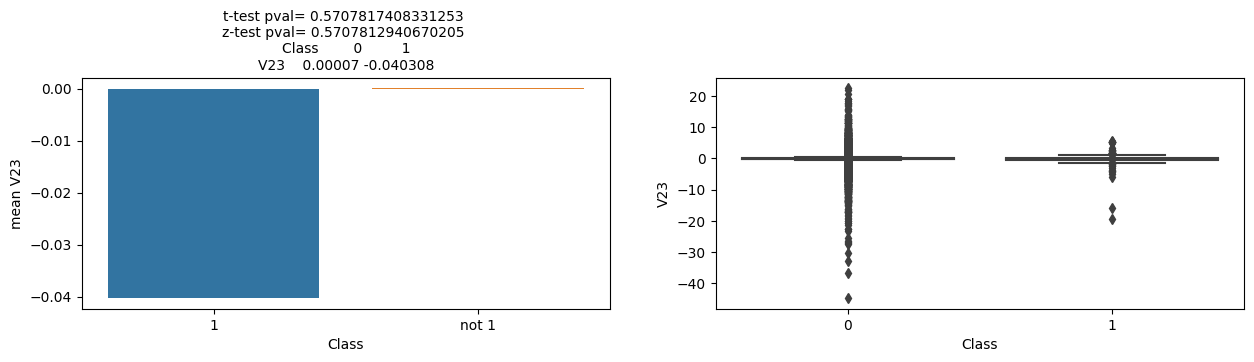

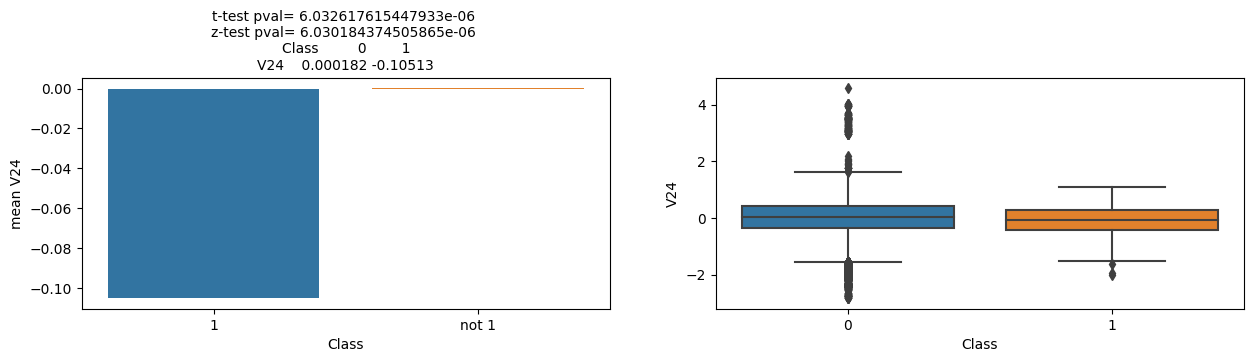

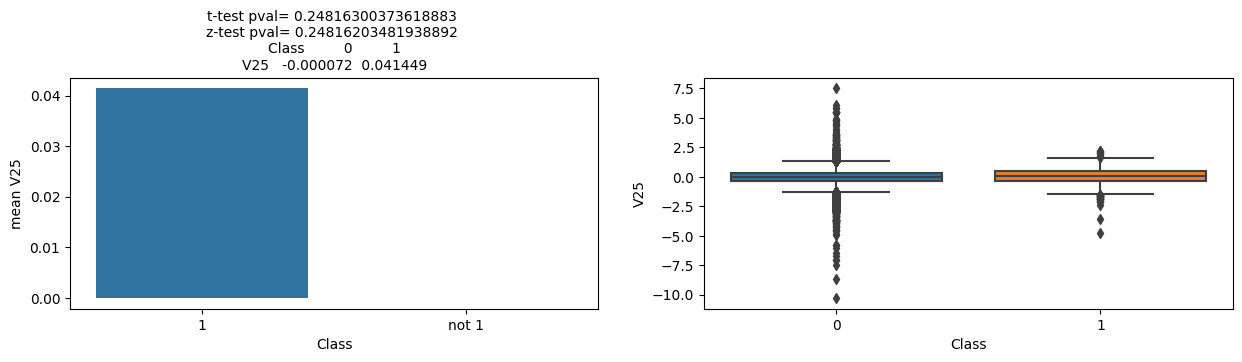

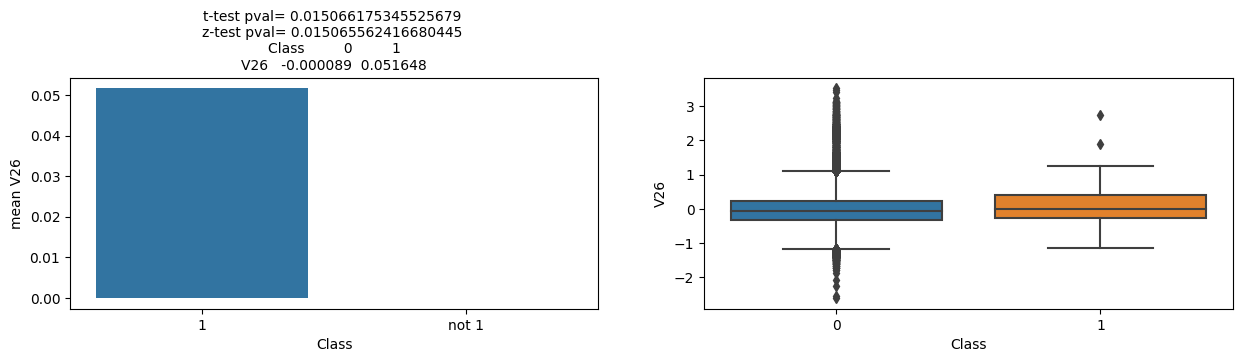

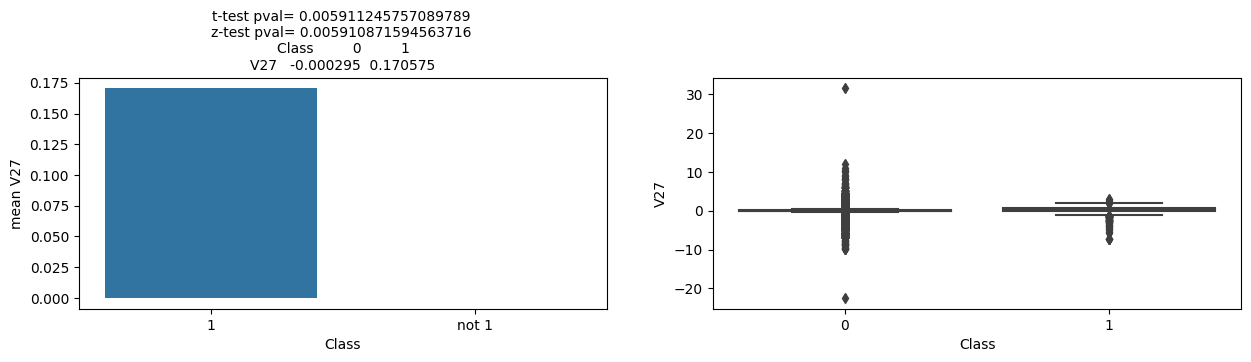

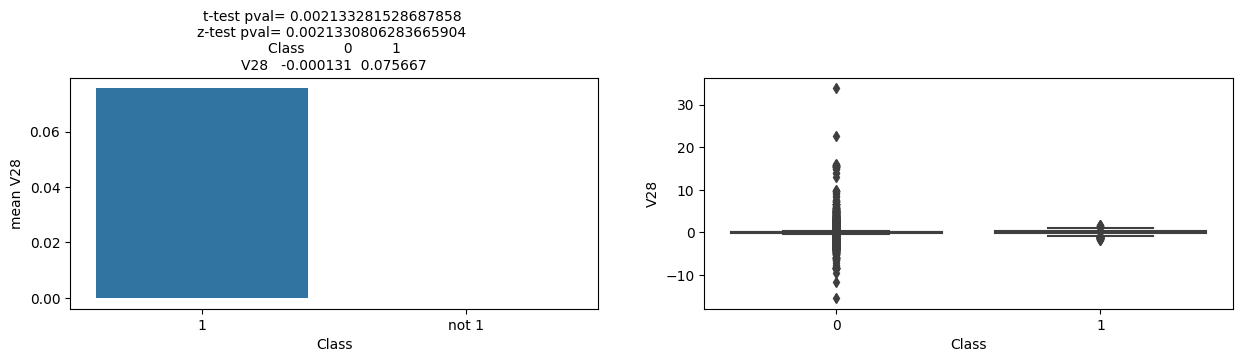

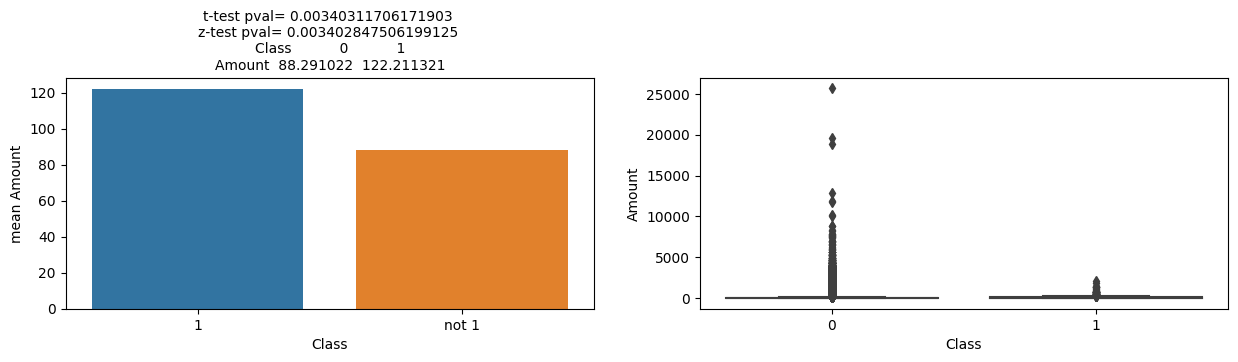

In [ ]:
for col in data.columns[:-1]:
    Bivariate_with_mean(data, col, 'Class', 1)

In [ ]:
# Bivariate with mean:
# Fraud dependent significantly on: Lower values of Time, V1, V3, V5, V6, V7, V9, V10, V12, V13, V14, V15, V16, V17, V18, V24
# Fraud dependent significantly on: Higher values of V2, V4, V11, V19, V20, V21, V26, V27, v28, Amount
# Fraud not dependent significantly on: V8, V22, V23, V25

In [ ]:
print(data['Amount'][data['Class']==1].mean(),
data['Amount'][data['Class']==1].median(),
data['Amount'][data['Class']==0].mean(),
data['Amount'][data['Class']==0].median())

122.21132113821139 9.25 88.29102242231328 22.0


In [ ]:
# Mean Amount of class 1 is more than that of class 0
# Median Amount of class 1 is less than that of class 0
# If there are differences like these, taking mean or median as central tendency measure can change hypotheses
# Since there are many outliers, median would be better as central tendency measure

In [ ]:
def Bivariate_with_median(data, cont, target, category):
    x1=data[cont][data[target]==category][:]
    x2=data[cont][~(data[target]==category)][:]
    
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.median(), x2.median()
    std1, std2 = x1.std(), x2.std()
    
    t_p_val= TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val= TwoSampZ(m1, m2, std1, std2, n1, n2)
    
    table=pd.pivot_table(data=data, columns= target, values=cont, aggfunc='median')
    
    plt.figure(figsize=(15,3))
    
    plt.subplot(1,2,1)
    sns.barplot(x=[str(category), 'not {}'.format(category)], y=[m1, m2])
    plt.ylabel('median {}'.format(cont))
    plt.xlabel(target)
    plt.title('t-test pval= {} \nz-test pval= {} \n{}'.format(t_p_val, z_p_val, table), fontsize=10)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=target, y=cont)

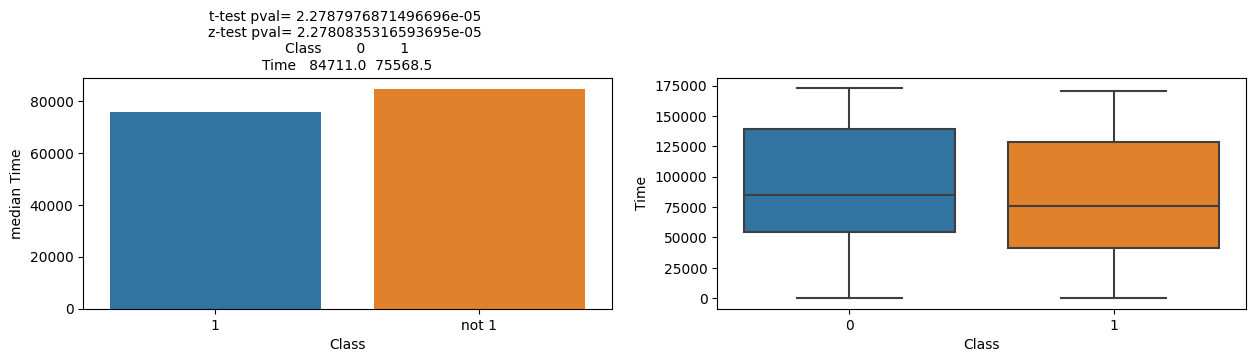

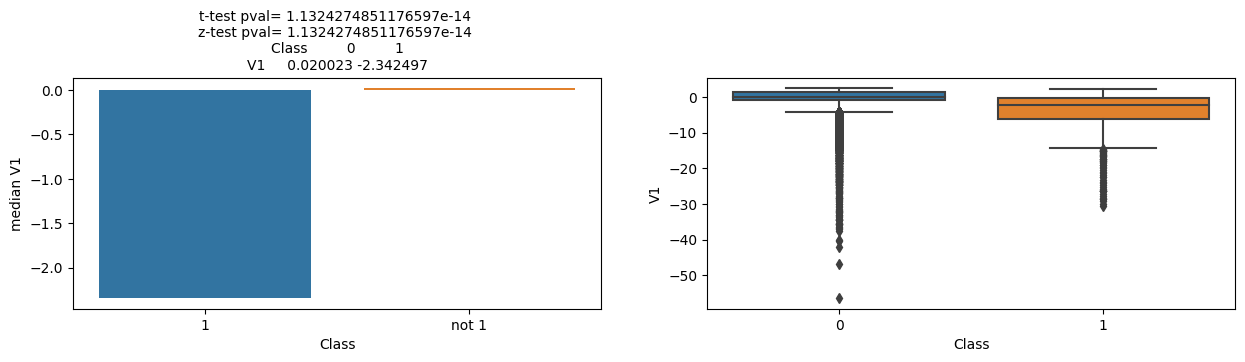

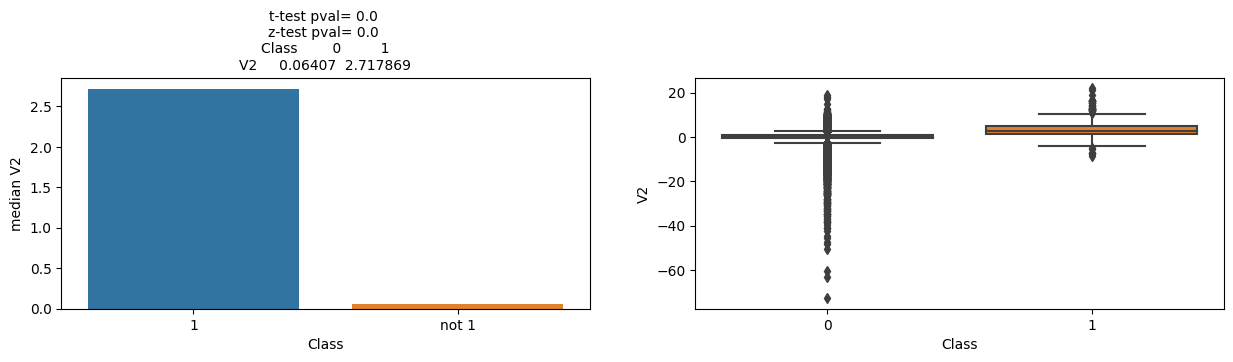

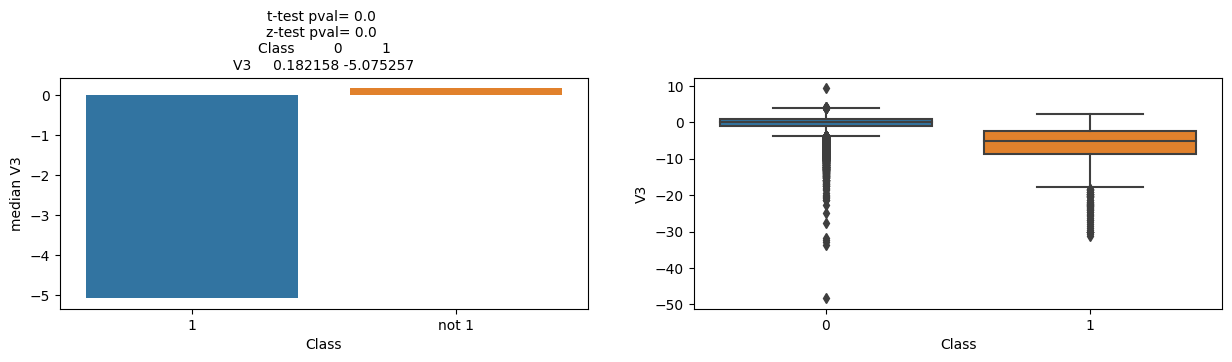

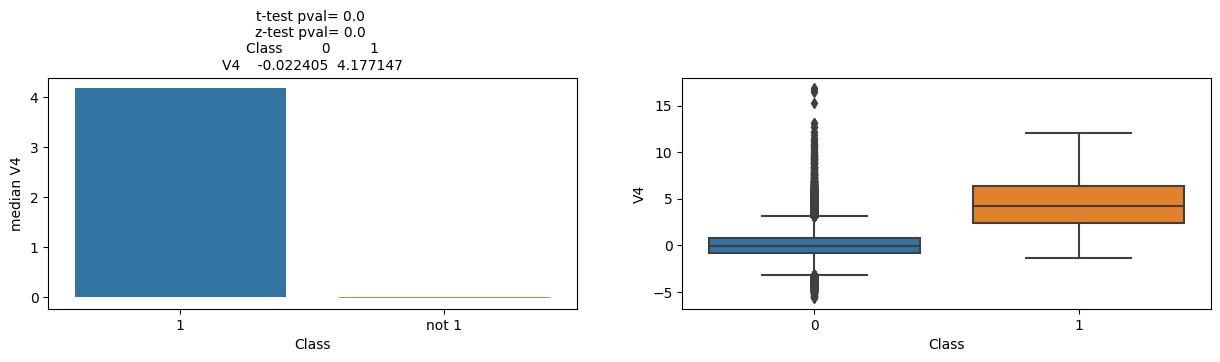

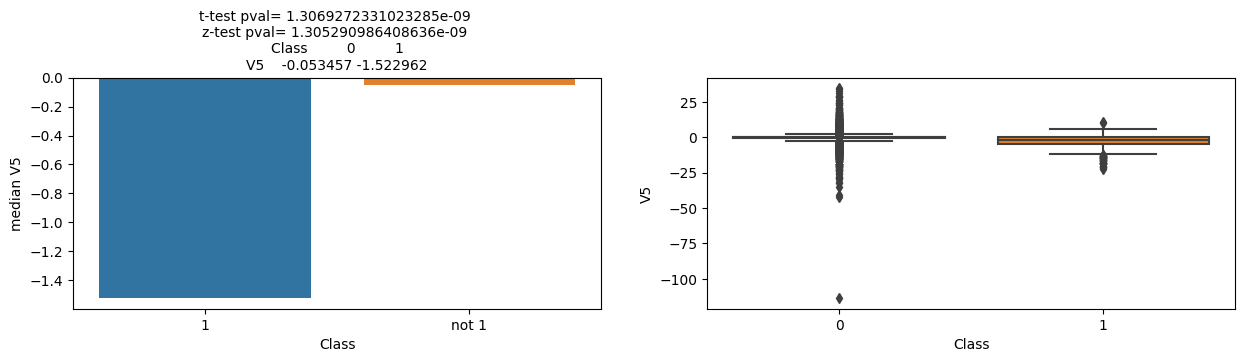

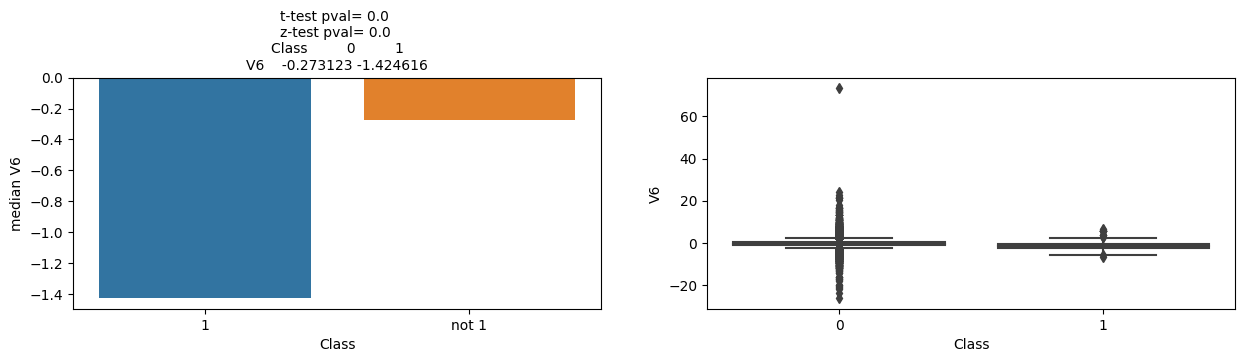

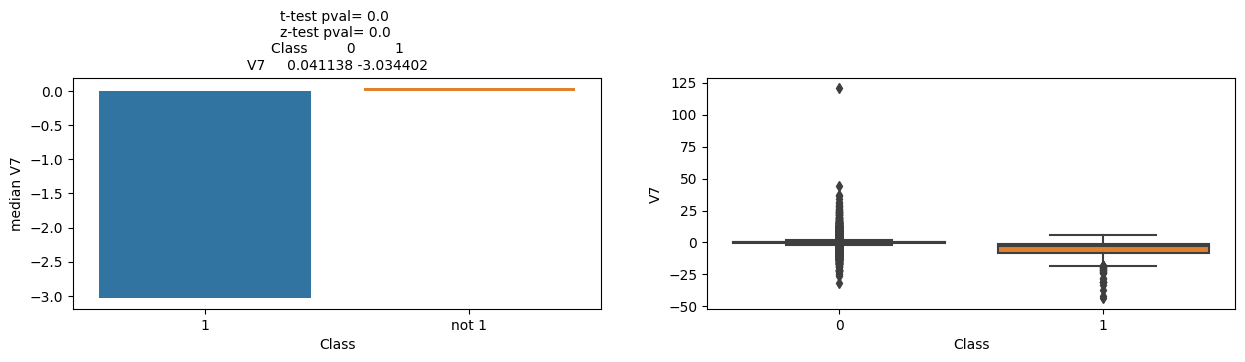

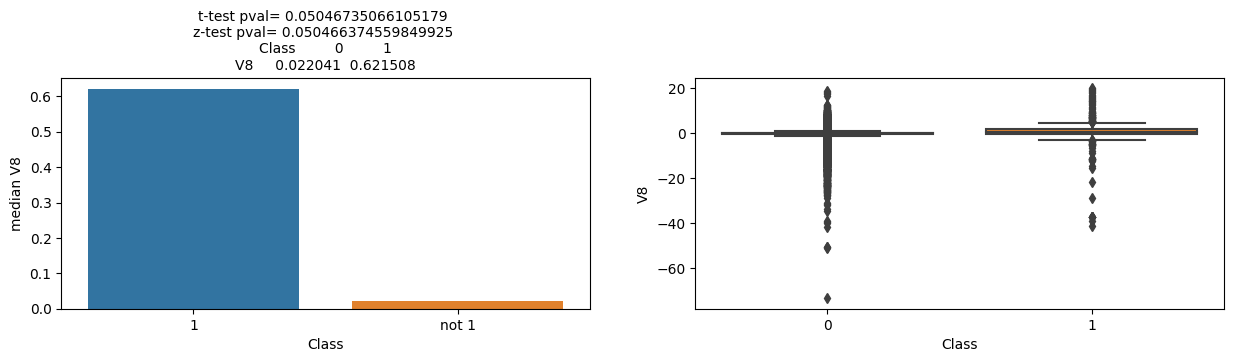

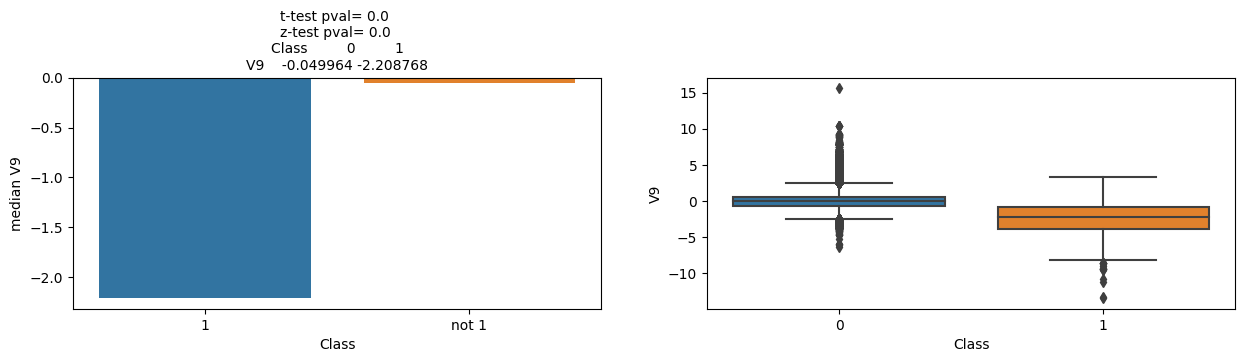

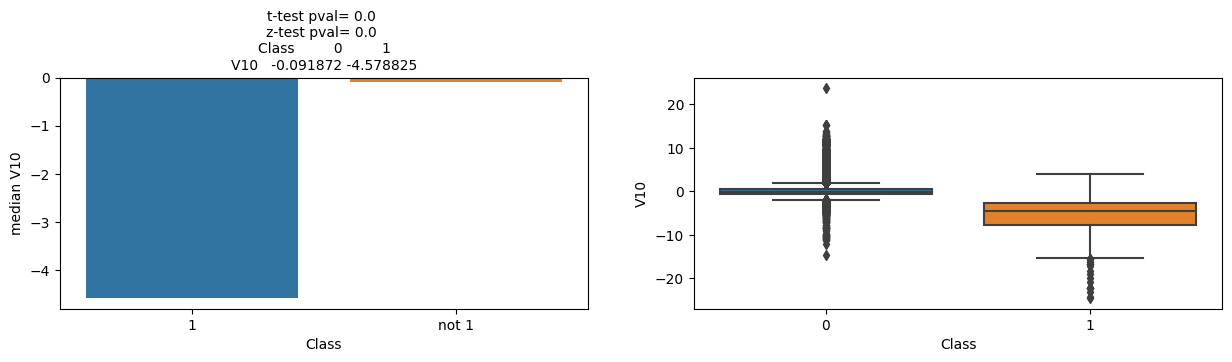

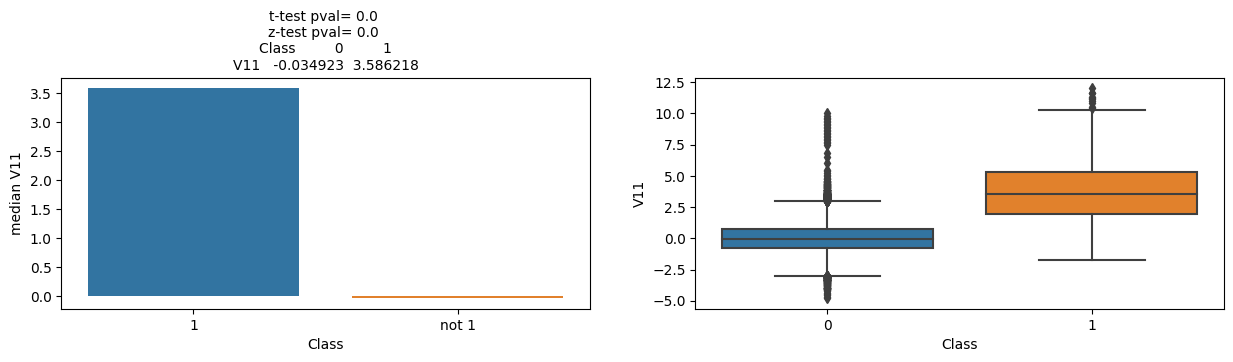

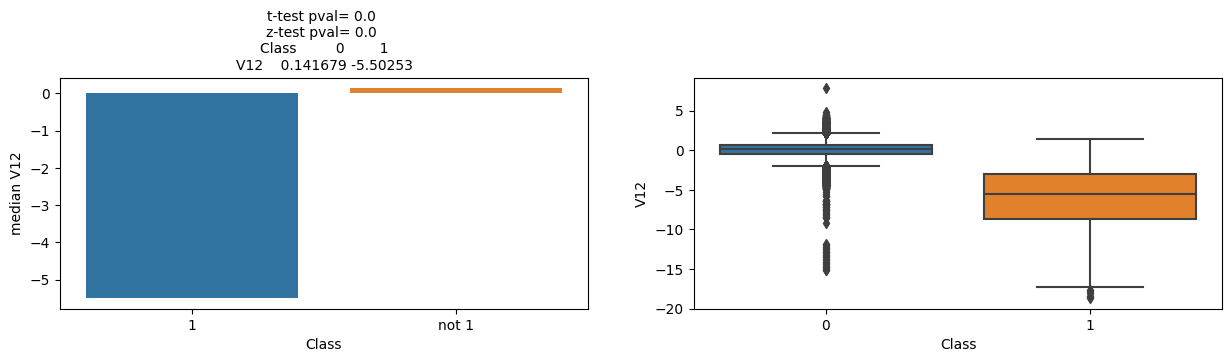

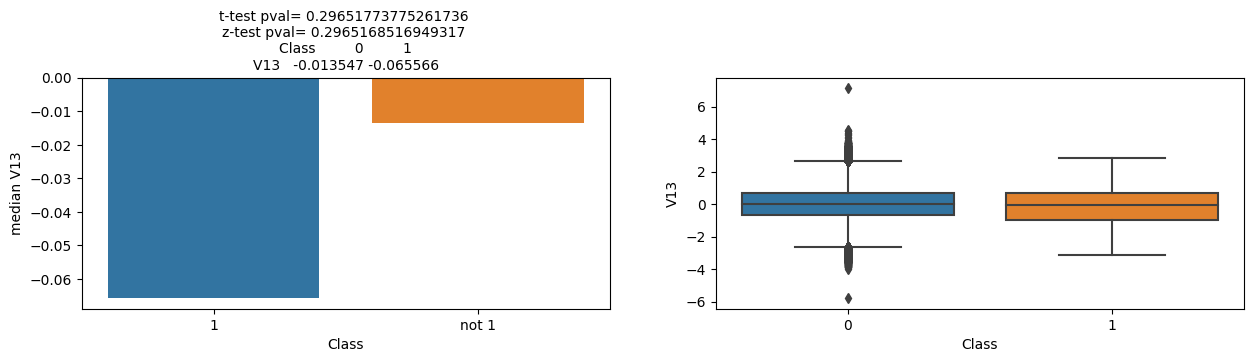

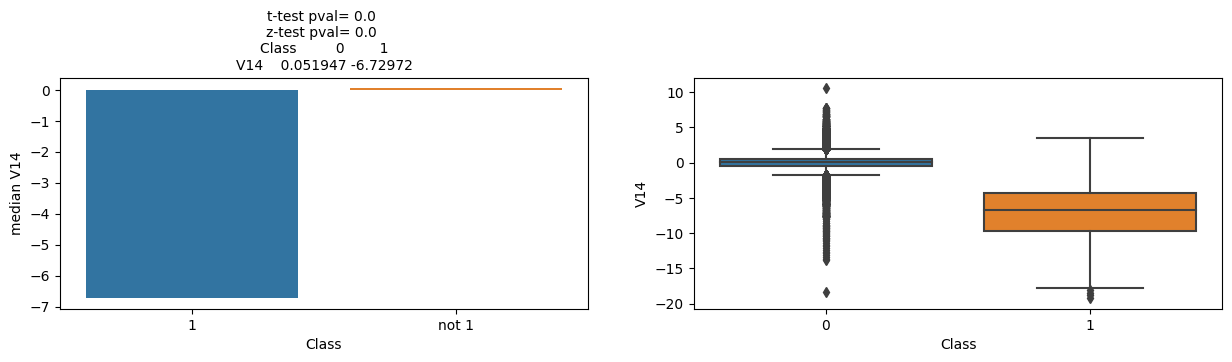

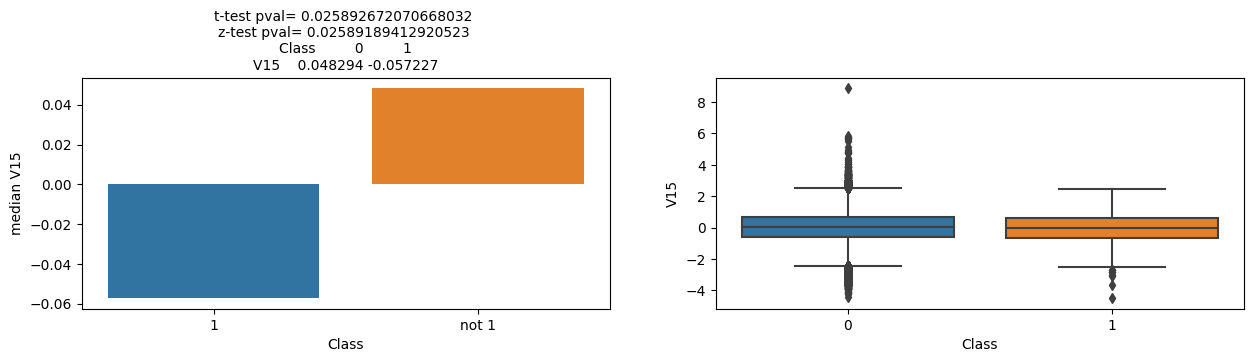

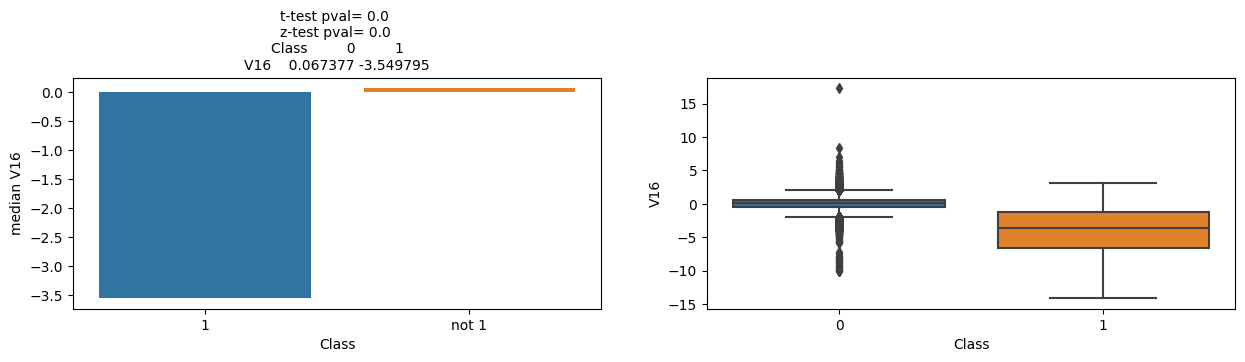

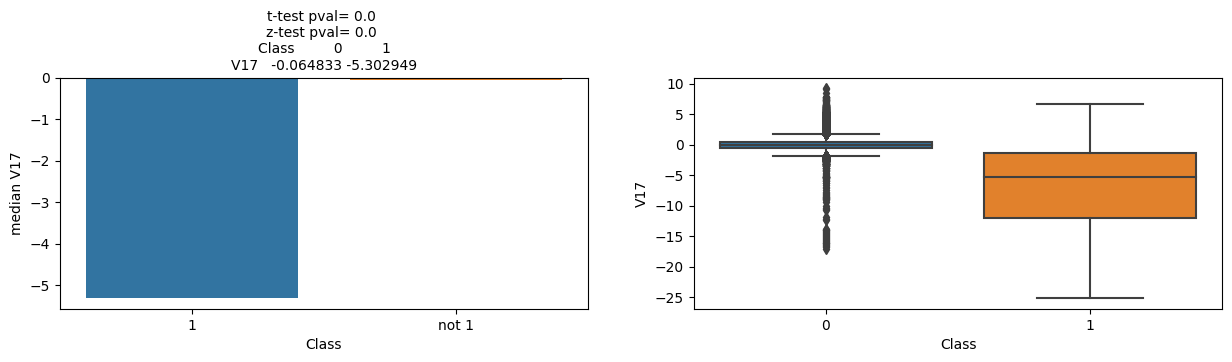

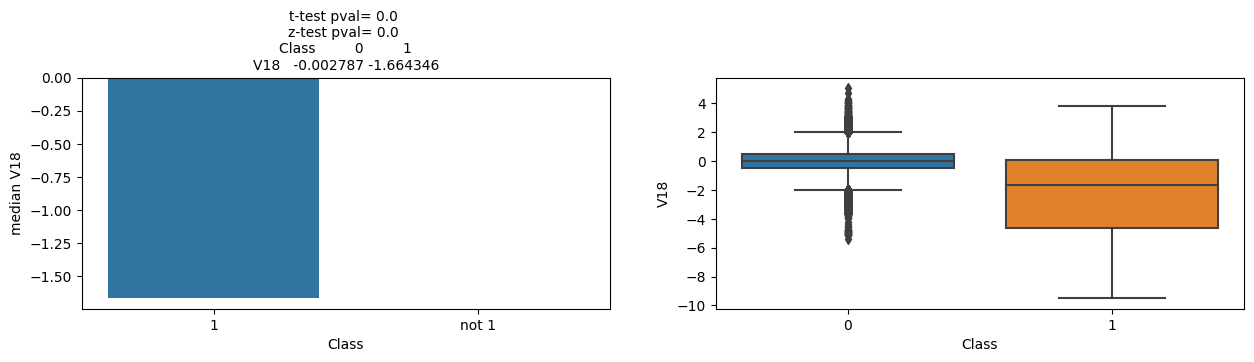

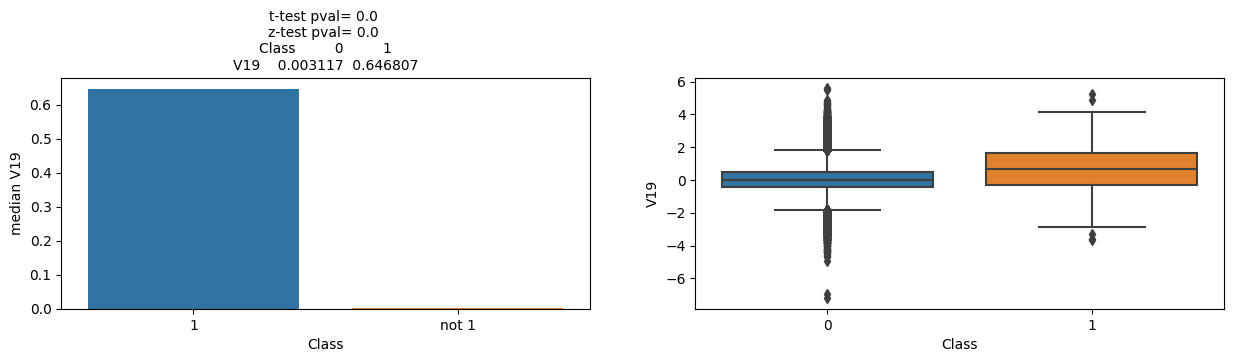

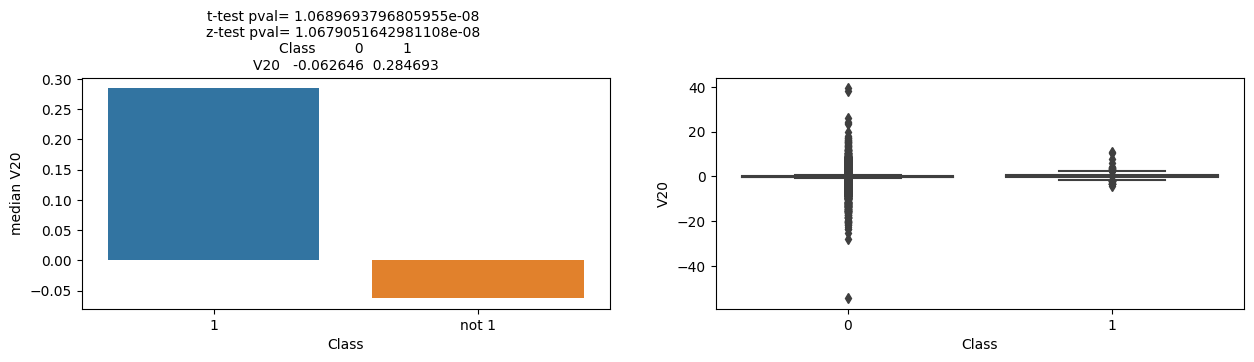

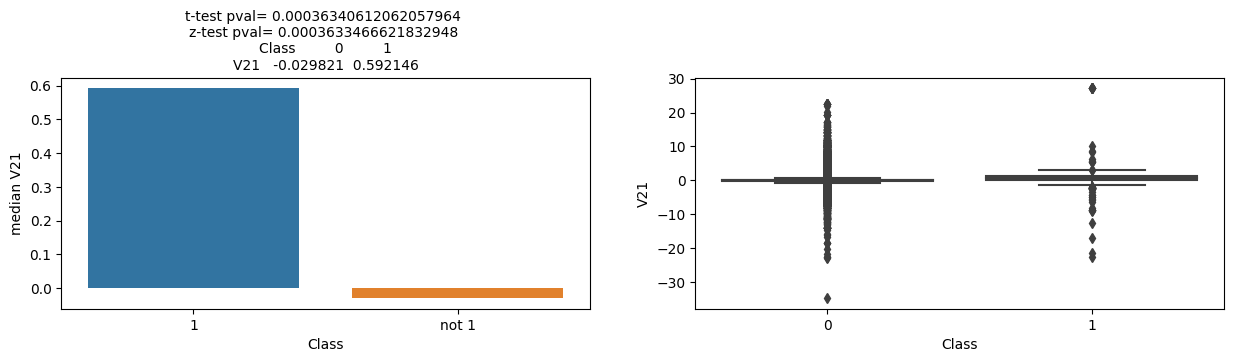

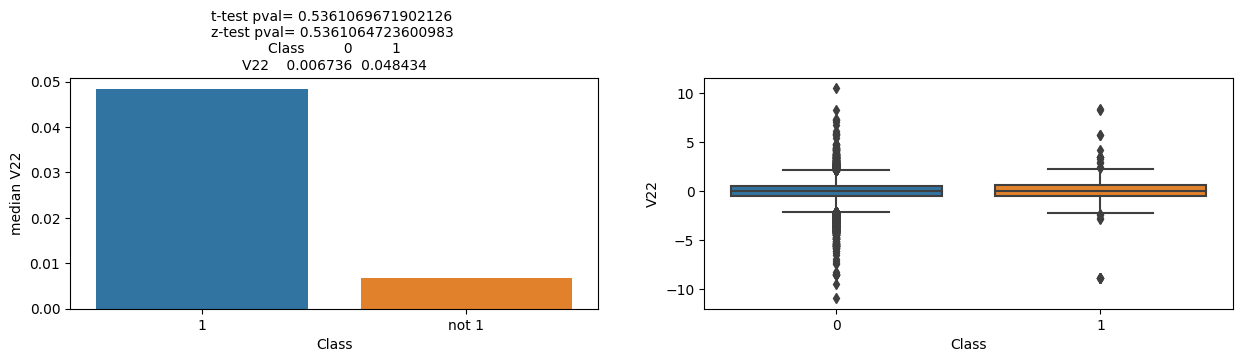

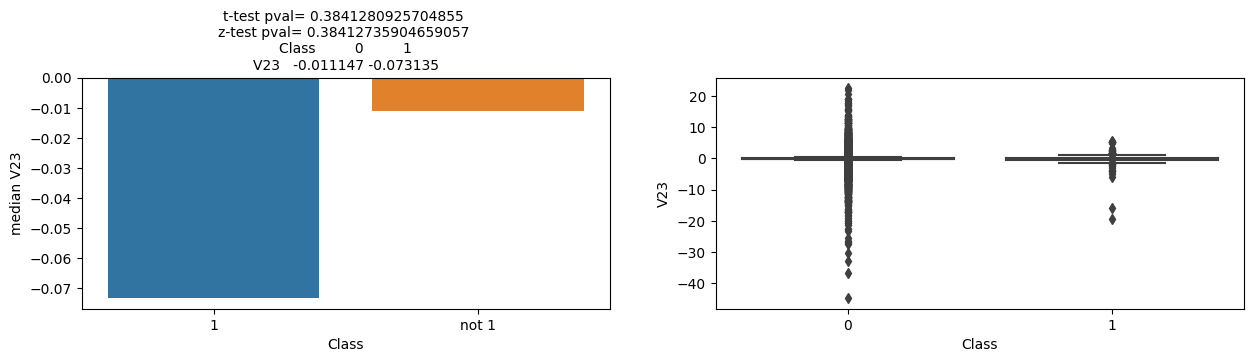

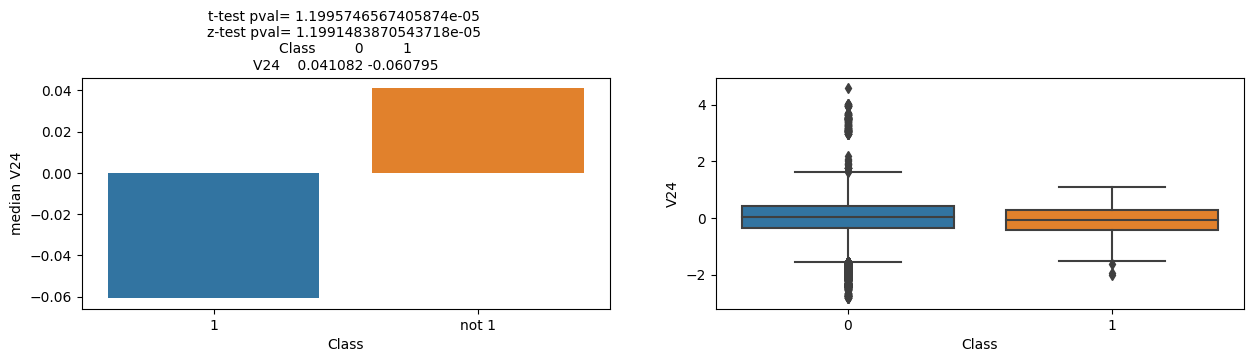

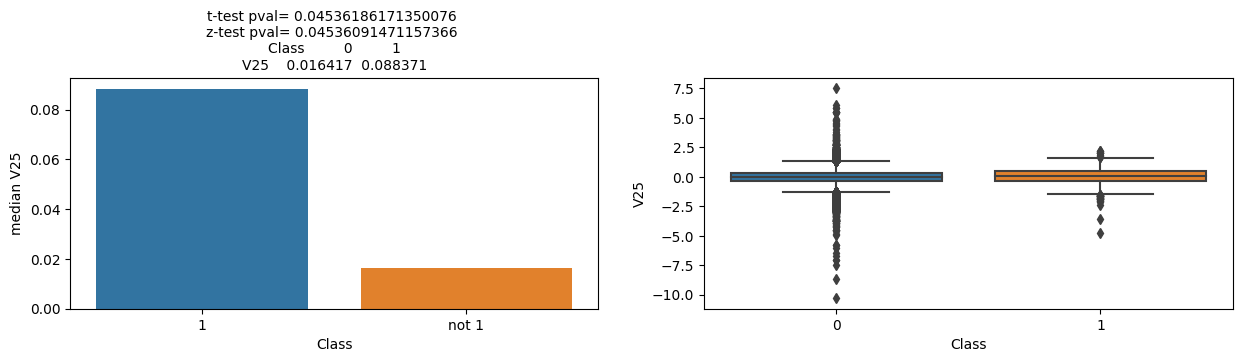

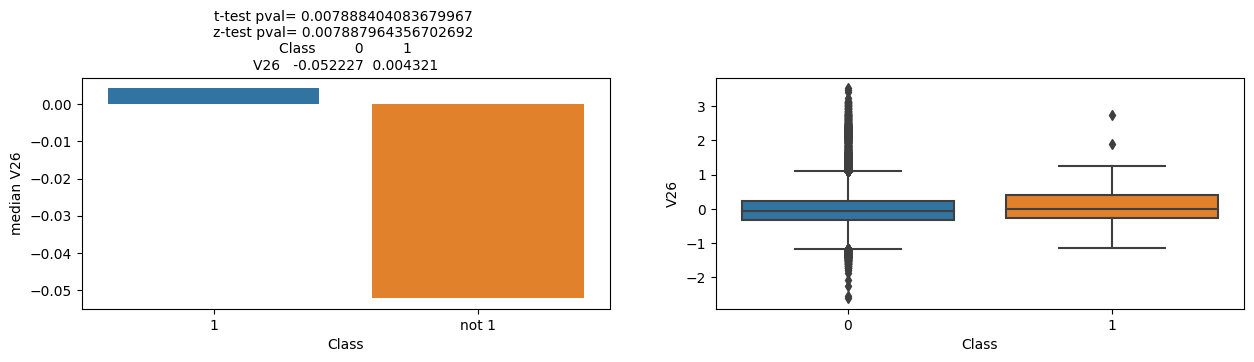

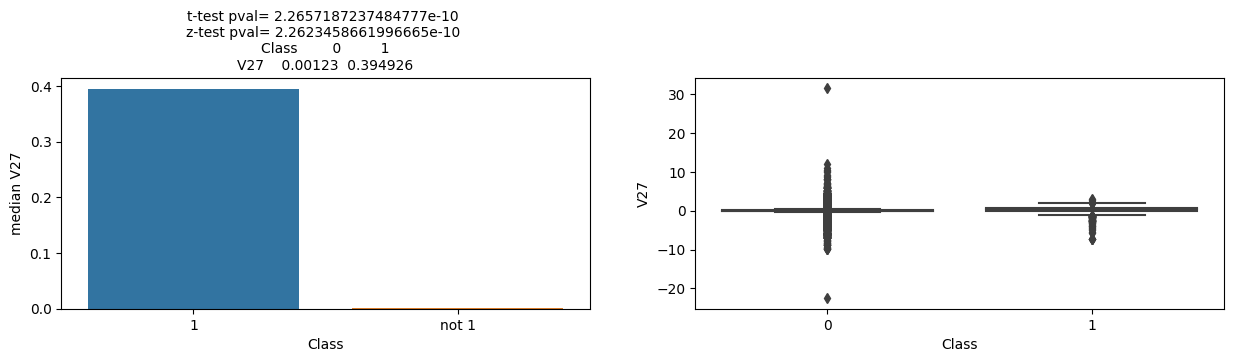

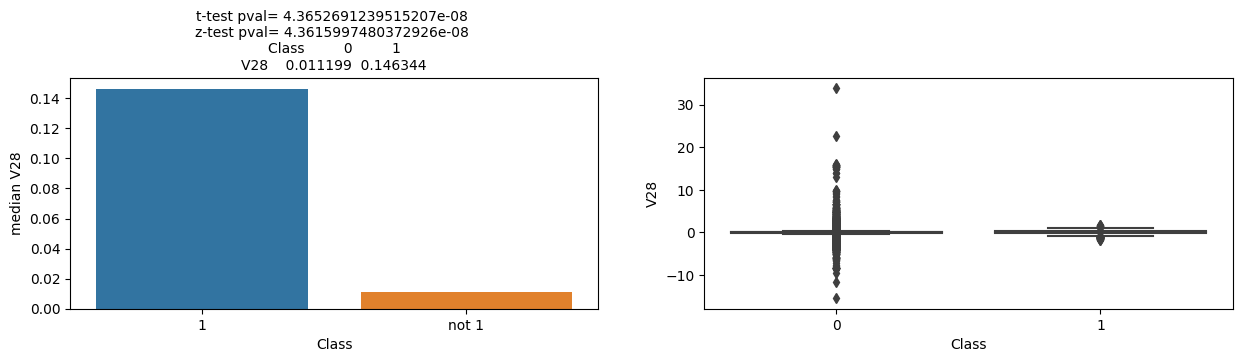

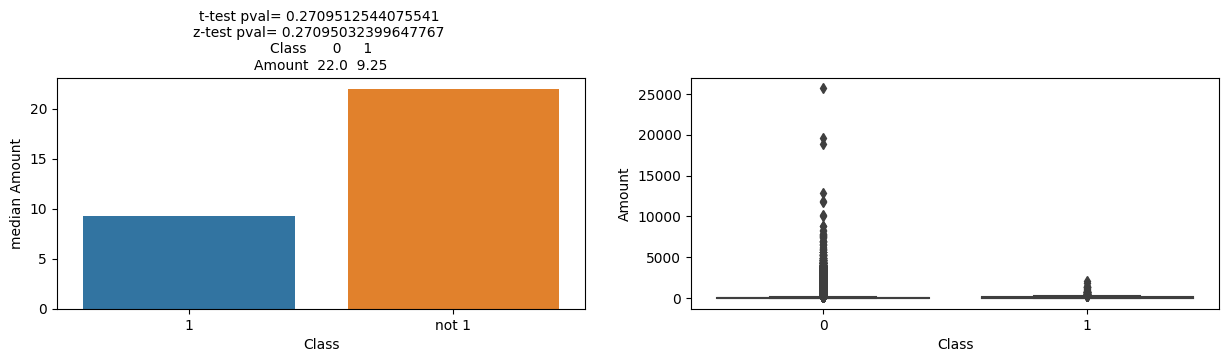

In [ ]:
for col in data.columns[:-1]:
    Bivariate_with_median(data, col, 'Class', 1)

In [ ]:
# Bivariate with median:
# Fraud dependent significantly on: Lower values of Time, V1, V3, V5, V6, V7, V9, V10, V12, V14, V15, V16, V17, V18, V24
# Fraud dependent significantly on: Higher values of V2, V4, V11, V19, V20, V21, V25, V26, V27, V28
# Fraud not dependent significantly on: V8, V13, V22, V23, Amount

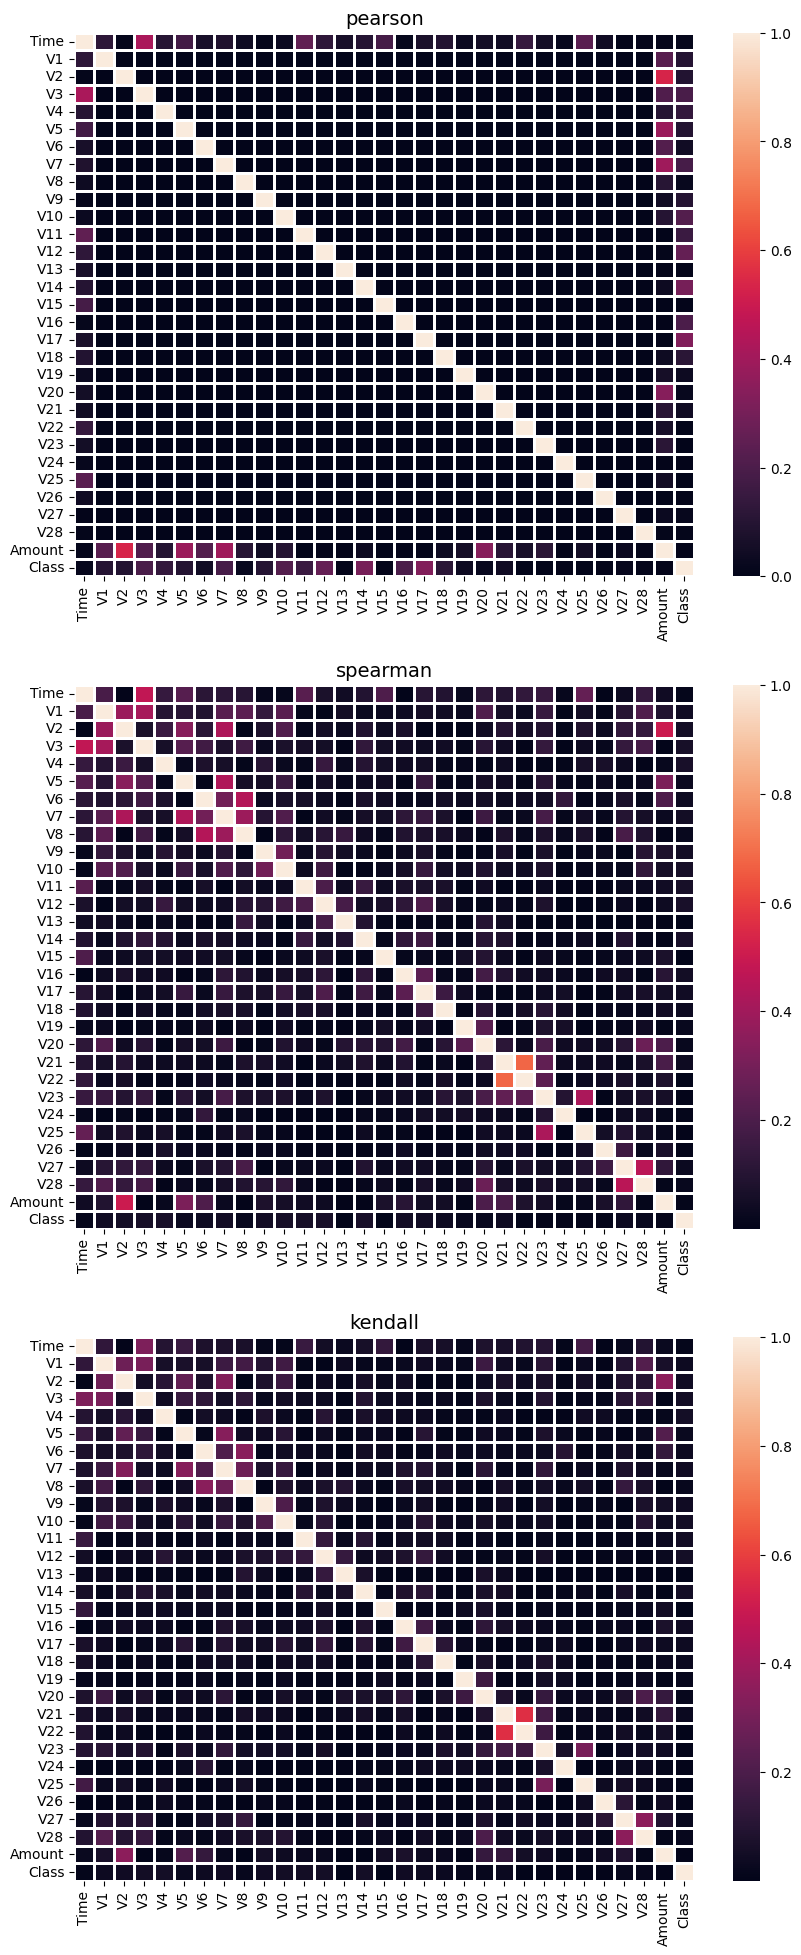

In [ ]:
plt.figure(figsize= (10,24), dpi=100)
for j,i in enumerate(['pearson', 'spearman', 'kendall']):
    corr=data.corr(method=i).abs()
    plt.subplot(3,1,j+1)
    sns.heatmap(corr, linewidth=2)
    plt.title(i, fontsize=14)

In [ ]:
# Kendall correlation would be best in this case due to huge presence of outliers
# Correlations:
# Amount-V2, V27-V28, V23-V25, V21-V22, Time-V3, V1-V2, V1-V3, V2-V7, V5-V7, V6-V8
# V21-V22 is the best correlated pair, but not enough to discard one of the pair

In [ ]:
# Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif=pd.Series([VIF(data.values,i) for i in range(data.shape[1])], index=data.columns)
print(vif)

Time       2.339858
V1         1.638237
V2         3.900804
V3         1.321018
V4         1.172479
V5         2.764441
V6         1.528629
V7         2.603517
V8         1.098591
V9         1.037715
V10        1.208870
V11        1.080378
V12        1.154440
V13        1.003473
V14        1.219562
V15        1.014148
V16        1.080994
V17        1.227258
V18        1.033900
V19        1.040800
V20        2.233935
V21        1.103107
V22        1.082408
V23        1.149293
V24        1.000773
V25        1.013526
V26        1.000539
V27        1.009509
V28        1.001595
Amount    11.507919
Class      2.093512
dtype: float64


In [ ]:
# Amount has a very high VIF, so must be discarded before modeling with any linear model

In [ ]:
# Baseline models: LogisticRegression, SVC, DecisionTreeClassifier
# Evaluation metrics: Precision score, Recall score, f1 score, roc-auc score, log loss
# First we try the baseline models with all variables, then we try to increase scores by removing variables according to
# i) Bivariate with mean , and ii) Bivariate with median analysis

In [4]:
from sklearn.model_selection import train_test_split as tts

y=data['Class']
X=data.drop('Class', axis=1)

xtrain, xtest, ytrain, ytest = tts(X,y,test_size=0.2, random_state=123, stratify = y)
X.shape, y.shape, xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((284807, 30), (284807,), (227845, 30), (56962, 30), (227845,), (56962,))

In [5]:
all_cols=X.columns
mean_analysis_cols=X.loc[:,~X.columns.isin(['V8', 'V22', 'V23', 'V25'])].columns
median_analysis_cols=X.loc[:,~X.columns.isin(['V8', 'V13', 'V22', 'V23', 'Amount'])].columns

In [ ]:
# Fitting with Logistic Regression
log_all=LogisticRegression().fit(xtrain, ytrain)
log_mean=LogisticRegression().fit(xtrain[mean_analysis_cols], ytrain)
log_median=LogisticRegression().fit(xtrain[median_analysis_cols], ytrain)

In [ ]:
log_arr=[log_all, log_mean, log_median]
col_arr=[all_cols, mean_analysis_cols, median_analysis_cols]
precision, recall, f1score, logloss, aucroc=[],[],[],[],[]

score_data=pd.DataFrame(columns=['Precision', 'Recall', 'F1 score', 'Log-loss', 'AUC-ROC'], index=['All', 'Mean', 'Median'])

for p,cols in zip(log_arr, col_arr):
    precision.append(precision_score(ytest,p.predict(xtest[cols])))
    recall.append(recall_score(ytest,p.predict(xtest[cols])))
    f1score.append(f1_score(ytest,p.predict(xtest[cols])))
    logloss.append(log_loss(ytest,p.predict(xtest[cols])))
    aucroc.append(roc_auc_score(ytest,p.predict_proba(xtest[cols])[:,1]))

score_data['Precision']=precision
score_data['Recall']=recall
score_data['F1 score']=f1score
score_data['Log-loss']=logloss
score_data['AUC-ROC']=aucroc

In [ ]:
score_data

Precision    Recall  F1 score  Log-loss   AUC-ROC
All      0.769231  0.612245  0.681818  0.035435  0.857892
Mean     0.772152  0.622449  0.689266  0.034802  0.874479
Median   0.768293  0.642857  0.700000  0.034169  0.902831

In [ ]:
# We can see from the above results that all metrics give best results when columns are taken according to Median analysis
# We will try with other models as well

In [6]:
# Cross-validation with all 4 models
def cv_score(ml_model, cols=all_cols, X=xtrain, y=ytrain, n_splits=5, rstate=567, exclude_probs=0):
    i=1
    cv_scores = pd.DataFrame(columns=['Precision', 'Recall', 'F1 score', 'Log-loss', 'AUC-ROC'], 
                             index=np.arange(n_splits)+1)
    df = X[cols]
    precision, recall, f1score, logloss, aucroc=[],[],[],[],[]

    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=n_splits, random_state=rstate, shuffle=True)
    for df_index,test_index in kf.split(df,y):
        print('{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df.iloc[df_index],df.iloc[test_index]
        ytr,yvl = y.iloc[df_index],y.iloc[test_index]
        
        model = ml_model.fit(xtr, ytr)
        pred_val = model.predict(xvl)
        if exclude_probs==0:
            pred_probs = model.predict_proba(xvl)
         
        precision.append(precision_score(yvl,pred_val))
        recall.append(recall_score(yvl,pred_val))
        f1score.append(f1_score(yvl,pred_val))
        logloss.append(log_loss(yvl,pred_val))
        if exclude_probs==0:
            aucroc.append(roc_auc_score(yvl,pred_probs[:,1]))
        i+=1

    cv_scores['Precision']=precision
    cv_scores['Recall']=recall
    cv_scores['F1 score']=f1score
    cv_scores['Log-loss']=logloss
    if exclude_probs==0:
        cv_scores['AUC-ROC']=aucroc
    
    return cv_scores

In [ ]:
# Recall will be the main metric we will focus on improving, i.e. reducing False -ves (Fraud transactions classified as legit)
# The objective is to gain as much as 95% Recall

In [7]:
# Logistic Regression CV
LR_scores_all=cv_score(LogisticRegression(), all_cols, rstate=1000)
LR_scores_mean=cv_score(LogisticRegression(), mean_analysis_cols, rstate=1000)
LR_scores_median=cv_score(LogisticRegression(), median_analysis_cols, rstate=1000)

1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5


In [8]:
LR_scores_all, LR_scores_mean, LR_scores_median

(   Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.746988  0.794872  0.770186  0.029266  0.911691
 2   0.736111  0.670886  0.701987  0.035594  0.919312
 3   0.759259  0.518987  0.616541  0.040339  0.890514
 4   0.657143  0.582278  0.617450  0.045085  0.919344
 5   0.696203  0.696203  0.696203  0.037966  0.949887,
    Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.579439  0.794872  0.670270  0.048249  0.909616
 2   0.739726  0.683544  0.710526  0.034803  0.918440
 3   0.666667  0.632911  0.649351  0.042712  0.891464
 4   0.662338  0.645570  0.653846  0.042712  0.894889
 5   0.779221  0.759494  0.769231  0.028475  0.959435,
    Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.721519  0.730769  0.726115  0.034012  0.928416
 2   0.794118  0.683544  0.734694  0.030848  0.947198
 3   0.696970  0.582278  0.634483  0.041921  0.908182
 4   0.647727  0.721519  0.682635  0.041921  0.933732
 5   0.716049  0.734177  0.725000  0.034803  0.971789)

In [10]:
LR_scores_all['Recall'].sum()/5, LR_scores_mean['Recall'].sum()/5, LR_scores_median['Recall'].sum()/5

(0.6526452450503084, 0.7032781564427133, 0.6904576436222005)

In [ ]:
# Decision Tree CV
DTC_scores_all=cv_score(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=80), all_cols, rstate=1000)
DTC_scores_mean=cv_score(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=80), mean_analysis_cols, rstate=1000)
DTC_scores_median=cv_score(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=80), median_analysis_cols, rstate=1000)

1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5


In [ ]:
DTC_scores_all, DTC_scores_mean, DTC_scores_median

(   Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.784810  0.794872  0.789809  0.026102  0.894560
 2   0.815789  0.784810  0.800000  0.024520  0.894496
 3   0.852941  0.734177  0.789116  0.024520  0.813068
 4   0.878788  0.734177  0.800000  0.022938  0.844410
 5   0.906250  0.734177  0.811189  0.021356  0.839919,
    Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.810811  0.769231  0.789474  0.025311  0.869034
 2   0.818182  0.797468  0.807692  0.023729  0.907140
 3   0.803030  0.670886  0.731034  0.030848  0.749844
 4   0.906250  0.734177  0.811189  0.021356  0.850883
 5   0.920635  0.734177  0.816901  0.020565  0.839215,
    Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.845070  0.769231  0.805369  0.022938  0.869072
 2   0.808219  0.746835  0.776316  0.026893  0.856543
 3   0.863636  0.721519  0.786207  0.024520  0.800444
 4   0.895522  0.759494  0.821918  0.020565  0.876133
 5   0.916667  0.696203  0.791367  0.022938  0.801300)

In [ ]:
DTC_scores_all['Recall'].sum()/5, DTC_scores_mean['Recall'].sum()/5, DTC_scores_median['Recall'].sum()/5

(0.7564427134047387, 0.7411879259980526, 0.7386562804284323)

In [ ]:
# SVC CV
SVC_scores_all=cv_score(LinearSVC(dual=False), all_cols, rstate=1000, exclude_probs=1)
SVC_scores_mean=cv_score(LinearSVC(dual=False), mean_analysis_cols, rstate=1000, exclude_probs=1)
SVC_scores_median=cv_score(LinearSVC(dual=False), median_analysis_cols, rstate=1000, exclude_probs=1)

1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5


In [ ]:
SVC_scores_all, SVC_scores_mean, SVC_scores_median

(   Precision    Recall  F1 score  Log-loss AUC-ROC
 1   0.863636  0.730769  0.791667  0.023729     NaN
 2   0.732143  0.518987  0.607407  0.041921     NaN
 3   0.700000  0.443038  0.542636  0.046667     NaN
 4   0.863636  0.481013  0.617886  0.037176     NaN
 5   0.854167  0.518987  0.645669  0.035594     NaN,
    Precision    Recall  F1 score  Log-loss AUC-ROC
 1   0.841270  0.679487  0.751773  0.027684     NaN
 2   0.714286  0.506329  0.592593  0.043503     NaN
 3   0.902439  0.468354  0.616667  0.036385     NaN
 4   0.854167  0.518987  0.645669  0.035594     NaN
 5   0.872340  0.518987  0.650794  0.034803     NaN,
    Precision    Recall  F1 score  Log-loss AUC-ROC
 1   0.771429  0.692308  0.729730  0.031639     NaN
 2   0.839286  0.594937  0.696296  0.032430     NaN
 3   0.864865  0.405063  0.551724  0.041130     NaN
 4   0.877551  0.544304  0.671875  0.033221     NaN
 5   0.860465  0.468354  0.606557  0.037966     NaN)

In [ ]:
SVC_scores_all['Recall'].sum()/5, SVC_scores_mean['Recall'].sum()/5, SVC_scores_median['Recall'].sum()/5

(0.5385589094449854, 0.5384290814670563, 0.5409931840311586)

In [ ]:
# XGBoost CV
XGB_scores_all=cv_score(XGBClassifier(tree_method='gpu_hist'), all_cols, rstate=1000)
XGB_scores_mean=cv_score(XGBClassifier(tree_method='gpu_hist'), mean_analysis_cols, rstate=1000)
XGB_scores_median=cv_score(XGBClassifier(tree_method='gpu_hist'), median_analysis_cols, rstate=1000)

1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5
1 of kfold 5
2 of kfold 5
3 of kfold 5
4 of kfold 5
5 of kfold 5


In [ ]:
XGB_scores_all, XGB_scores_mean, XGB_scores_median

(   Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.940299  0.807692  0.868966  0.015028  0.990267
 2   0.914286  0.810127  0.859060  0.016610  0.982673
 3   0.968750  0.784810  0.867133  0.015028  0.959823
 4   0.942029  0.822785  0.878378  0.014237  0.980828
 5   0.969231  0.797468  0.875000  0.014237  0.977077,
    Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.926471  0.807692  0.863014  0.015819  0.987649
 2   0.914286  0.810127  0.859060  0.016610  0.977207
 3   0.953846  0.784810  0.861111  0.015819  0.961998
 4   0.942029  0.822785  0.878378  0.014237  0.984210
 5   0.955224  0.810127  0.876712  0.014237  0.983558,
    Precision    Recall  F1 score  Log-loss   AUC-ROC
 1   0.955224  0.820513  0.882759  0.013446  0.984922
 2   0.940299  0.797468  0.863014  0.015819  0.980896
 3   0.953846  0.784810  0.861111  0.015819  0.967115
 4   0.942029  0.822785  0.878378  0.014237  0.984302
 5   0.940299  0.797468  0.863014  0.015819  0.991709)

In [ ]:
XGB_scores_all['Recall'].sum()/5, XGB_scores_mean['Recall'].sum()/5, XGB_scores_median['Recall'].sum()/5

(0.8045764362220058, 0.8071080817916261, 0.8046088932164881)

In [ ]:
# Till now we have got best average CV scores with XGBoost Classifier. We will thus proceed to Hyperparameter tuning on this

In [ ]:
# Random Search

params = { 'max_depth': [1,2,3,4,5,6],
           'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
           'gamma': [1,2,3,4,5],
           'max_delta_step': np.arange(1,5),
           'colsample_bytree': np.arange(0.7, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.7, 1.0, 0.1),
           'colsample_bynode': np.arange(0.7, 1.0, 0.1),
           'n_estimators': [100,200,300,400,500] }

rs_clf= RandomizedSearchCV(estimator=XGBClassifier(seed=167, tree_method='gpu_hist'), refit='recall',
                           param_distributions=params, n_iter=50, verbose=3, scoring = ('recall','precision','f1'))

In [ ]:
rs_clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END colsample_bylevel=0.7999999999999999, colsample_bynode=0.7, colsample_bytree=0.9999999999999999, gamma=3, learning_rate=0.1, max_delta_step=3, max_depth=3, n_estimators=100; f1: (test=0.887) precision: (test=0.918) recall: (test=0.859) total time=   2.3s
[CV 2/5] END colsample_bylevel=0.7999999999999999, colsample_bynode=0.7, colsample_bytree=0.9999999999999999, gamma=3, learning_rate=0.1, max_delta_step=3, max_depth=3, n_estimators=100; f1: (test=0.871) precision: (test=0.941) recall: (test=0.810) total time=   1.2s
[CV 3/5] END colsample_bylevel=0.7999999999999999, colsample_bynode=0.7, colsample_bytree=0.9999999999999999, gamma=3, learning_rate=0.1, max_delta_step=3, max_depth=3, n_estimators=100; f1: (test=0.853) precision: (test=0.953) recall: (test=0.772) total time=   1.1s
[CV 4/5] END colsample_bylevel=0.7999999999999999, colsample_bynode=0.7, colsample_bytree=0.9999999999999999, gamma=3, learning_rate=0

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   param_distributions={'colsample_bylevel': array([0.7, 0.8, 0.9, 1. ]),
                                        'colsample_bynode': array([0.7, 0.8, 0.9, 1. ]),
                                        'colsample_bytree': array([0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [1, 2, 3, 4, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_delta_step': array([1, 2, 3, 4]),
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   refit='recall', scoring=('recall', 'precision', 'f1'),
                   verbose=3)

In [ ]:
rs_clf.best_params_, rs_clf.best_score_

({'n_estimators': 500,
  'max_depth': 5,
  'max_delta_step': 2,
  'learning_rate': 0.1,
  'gamma': 1,
  'colsample_bytree': 0.8999999999999999,
  'colsample_bynode': 0.7999999999999999,
  'colsample_bylevel': 0.8999999999999999},
 0.8097695553391755)

In [ ]:
a=pd.DataFrame(rs_clf.cv_results_)
print('Recall:',float(a[a['rank_test_recall']==1]['mean_test_recall']))
print('Precision:',float(a[a['rank_test_recall']==1]['mean_test_precision']))
print('F1:',float(a[a['rank_test_recall']==1]['mean_test_f1']))

Recall: 0.8097695553391755
Precision: 0.9499428744598738
F1: 0.8734289871202622


In [ ]:
# Grid Search

params = { 'max_depth': [3,4,5],
           'learning_rate': [0.1, 0.2],
           'gamma': [1,2],
           'max_delta_step': [2,3],
           'n_estimators': [300,400,500] }

gs_clf= GridSearchCV(estimator=XGBClassifier(seed=167, tree_method='gpu_hist', 
                     colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.8), 
                     param_grid=params, scoring =('recall','precision','f1'), verbose=3, refit='recall')

In [ ]:
gs_clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=1, learning_rate=0.1, max_delta_step=2, max_depth=3, n_estimators=300; f1: (test=0.880) precision: (test=0.917) recall: (test=0.846) total time=   1.6s
[CV 2/5] END gamma=1, learning_rate=0.1, max_delta_step=2, max_depth=3, n_estimators=300; f1: (test=0.880) precision: (test=0.930) recall: (test=0.835) total time=   1.4s
[CV 3/5] END gamma=1, learning_rate=0.1, max_delta_step=2, max_depth=3, n_estimators=300; f1: (test=0.847) precision: (test=0.938) recall: (test=0.772) total time=   1.4s
[CV 4/5] END gamma=1, learning_rate=0.1, max_delta_step=2, max_depth=3, n_estimators=300; f1: (test=0.878) precision: (test=0.942) recall: (test=0.823) total time=   1.4s
[CV 5/5] END gamma=1, learning_rate=0.1, max_delta_step=2, max_depth=3, n_estimators=300; f1: (test=0.843) precision: (test=0.967) recall: (test=0.747) total time=   1.4s
[CV 1/5] END gamma=1, learning_rate=0.1, max_delta_step=2, max_depth=3, n_estimator

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=0.9,
                                     colsample_bynode=0.8, colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [1, 2], 'learning_rate': [0.1, 0.2],
                         'max_delta_step': [2, 3], 'max_depth': [3, 4, 5],
                         'n_estimators': [300, 400, 500]},
             refit='recall', scoring=('recall', 'precision', 'f1'), verbose=3)

In [ ]:
gs_clf.best_params_, gs_clf.best_score_

({'gamma': 1,
  'learning_rate': 0.1,
  'max_delta_step': 2,
  'max_depth': 5,
  'n_estimators': 300},
 0.8097695553391755)

In [ ]:
a=pd.DataFrame(gs_clf.cv_results_)
print('Recall:',float(a[a['rank_test_recall']==1]['mean_test_recall'].mean()))
print('Precision:',float(a[a['rank_test_recall']==1]['mean_test_precision'].mean()))
print('F1:',float(a[a['rank_test_recall']==1]['mean_test_f1'].mean()))

Recall: 0.8097695553391754
Precision: 0.9499428744598738
F1: 0.8734289871202622


In [ ]:
# No improvement in score with Grid Search over Random Search
# We can try with balancing weights of +ve and -ve classes with scale_pos_weight hyperparameter

In [ ]:
ratio= data['Class'].value_counts()[0]/data['Class'].value_counts()[1]

In [ ]:
# Grid Search

params = { 'max_depth': [3,4,5],
           'learning_rate': [0.1, 0.2],
           'gamma': [1,2],
           'max_delta_step': [0,1,2], 
           'n_estimators': [100,200,300] }

# max_delta_step shouldn't be required when balancing class weights, so default 0 value option given
gs_clf= GridSearchCV(estimator= XGBClassifier(scale_pos_weight=ratio, seed=167, tree_method='gpu_hist',
                     colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.8), param_grid=params,
                     scoring =('recall','precision','f1'), verbose=2, refit='recall')

In [ ]:
gs_clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=100; total time=   2.5s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=100; total time=   2.1s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=3, n_estimators=200; total time= 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=0.9,
                                     colsample_bynode=0.8, colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [1, 2], 'learning_rate': [0.1, 0.2],
                         'max_delta_step': [0, 2], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300, 500]},
             refit='recall', scoring=('recall', 'precision', 'f1'), verbose=2)

In [ ]:
gs_clf.best_params_, gs_clf.best_score_

({'gamma': 1,
  'learning_rate': 0.1,
  'max_delta_step': 2,
  'max_depth': 3,
  'n_estimators': 100},
 0.8832521908471275)

In [ ]:
a=pd.DataFrame(gs_clf.cv_results_)

print('Recall:',float(a[a['rank_test_recall']==1]['mean_test_recall'].mean()))
print('Precision:',float(a[a['rank_test_recall']==1]['mean_test_precision'].mean()))
print('F1:',float(a[a['rank_test_recall']==1]['mean_test_f1'].mean()))

Recall: 0.8832521908471275
Precision: 0.24439768488180458
F1: 0.3812335684820861


In [ ]:
best_parameters= ({'gamma': 1,
  'learning_rate': 0.1,
  'max_delta_step': 2,
  'max_depth': 3,
  'n_estimators': 100},
 0.8832521908471275)

In [ ]:
# Significant improvement in Recall score than previous tuning searches done without balancing class weights

In [ ]:
# Testing on test dataset

clf=XGBClassifier(**{'gamma': 1, 'learning_rate': 0.1, 'max_delta_step': 2, 'max_depth': 3, 'n_estimators': 100 },
                     scale_pos_weight=ratio,
                     colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.8, seed=167, tree_method='gpu_hist')
clf.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.8, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=3, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred), '\nPrecision:', precision_score(ytest, pred) , '\nF1:', f1_score(ytest, pred))

Recall: 0.8367346938775511 
Precision: 0.18141592920353983 
F1: 0.2981818181818182


In [ ]:
# We can see that Recall score in test dataset is quite good at 83.7%

In [ ]:
# Regarding low precision value:
# Precision denotes the fraction of correct true predictions among all true predictions
# In this case, this value is of no utility, the important thing being that we predict as many fraud and legit transactions correctly
# Another important point is that we want to minimise False -ves (frauds being classified legit) to greatest extent possible
# So in reality, precision and F1 score is not useful to us, rather the RECALL score of both +ve and -ve class is important
# As Recall score of +ve class is the TPR, Recall of -ve class is the TNR

In [ ]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
print(cr(ytest, clf.predict(xtest)))
print(cm(ytest,pd.DataFrame(clf.predict(xtest))))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.84      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.65     56962
weighted avg       1.00      0.99      1.00     56962

[[56494   370]
 [   16    82]]


In [ ]:
# From the confusion matrix above we can calculate exactly the values we need
CM=cm(ytest,pd.DataFrame(clf.predict(xtest)))
TN=CM[0,0]
FP=CM[0,1]
FN=CM[1,0]
TP=CM[1,1]
Recall_1=TP/(TP+FN)
Recall_0=TN/(TN+FP)
Recall_1, Recall_0

(0.8367346938775511, 0.9934932470455824)

In [ ]:
# To avoid checking these 2 metrics repeatedly, we can combine them by take the mean of these two
# Also, Recall_1 should have more weightage than Recall_0, as minimizing False -ves is more important

In [ ]:
# F1 score (H.M. of precision & recall) is used in classification presumably because of all kinds of means, H.M. produces the lowest value of mean
# Thus both the values will have to be really good in order to increase the score, higher value of which is easier in case of A.M. or G.M.
# Also, H.M. gives more importance by itself for lower values than for higher values, which is opposite in case of A.M., and equal importance in G.M.

In [ ]:
# We can employ 2 ways to construct a custom metric better suited for our use case
# Firstly, since Recall_1 tends to have a lower value than Recall_0, we will use the H.M. to construct the custom metric
# Secondly, to give more importance to Recall_1, we give Recall_1 and Recall_0 2:1 weightage in the H.M. calculation
# Custom Metric= 3/(1/R_0 + 2/R_1)

In [ ]:
# Making custom scoring function
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix as cm

def composite_score(y, y_pred):
  CM=cm(y,y_pred)
  TN=CM[0,0]
  FP=CM[0,1]
  FN=CM[1,0]
  TP=CM[1,1]
  Recall_1=TP/(TP+FN)
  Recall_0=TN/(TN+FP)
  score=3/(1/Recall_0 + 2/Recall_1)
  return score

composite_scorer= make_scorer(composite_score)


In [ ]:
composite_score(ytest, pd.DataFrame(clf.predict(xtest)))

0.8831859230416089

In [ ]:
# CV: Recall is 88.3%
# Testing: Recall is 83.7% and Composite is 88.3%

In [ ]:
# As seen from above results, even with Hyperparameter tuning, Recall value is not close to 95%
# We will now try some other methods, namely, Undersampling and Oversampling, which try to rectify the class imbalance
# Undersampling reduces the datapoints count of the majority class
# Oversampling synthetically increases the datapoints count of the minority class
# We will observe whether these methodologies are better than balancing weights within XGBoost
# We will use imbalanced-learn library for this

In [ ]:
# Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=167)
x_res, y_res = rus.fit_resample(xtrain, ytrain)
print(x_res.shape, y_res.shape)
y_res.value_counts()

(788, 30) (788,)


0    394
1    394
Name: Class, dtype: int64

In [ ]:
# RandomSearch with Undersampling

params = { 'max_depth': [1,2,3,4,5,6],
           'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
           'gamma': [1,2,3,4,5],
           'max_delta_step': np.arange(0,5),
           'colsample_bytree': np.arange(0.7, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.7, 1.0, 0.1),
           'colsample_bynode': np.arange(0.7, 1.0, 0.1),
           'n_estimators': [100,200,300,400,500] }

rs_clf= RandomizedSearchCV(estimator=XGBClassifier(seed=167, tree_method='gpu_hist'),
                  random_state=357, param_distributions=params, n_iter=50, refit='recall',
scoring ={'recall': make_scorer(recall_score), 'comp_score': composite_scorer}, verbose=3)

In [ ]:
rs_clf.fit(x_res, y_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.923) recall: (test=0.899) total time=   0.4s
[CV 2/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.939) recall: (test=0.911) total time=   0.5s
[CV 3/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.932) recall: (test=0.911) total time=   0.4s
[CV 4/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, lea

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                        'colsample_bynode': array([0.7, 0.8, 0.9, 1. ]),
                                        'colsample_bytree': array([0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [1, 2, 3, 4, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_delta_step': array([0, 1, 2, 3, 4]),
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=357, refit='recall',
                   scoring={'comp_score': make_scorer(composite_score),
                            'recall': make_scorer(recall_score)},
                   verbose=3)

In [ ]:
rs_clf.best_params_, rs_clf.best_score_

({'n_estimators': 500,
  'max_depth': 1,
  'max_delta_step': 1,
  'learning_rate': 0.2,
  'gamma': 1,
  'colsample_bytree': 0.7,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 0.8999999999999999},
 0.9162934112301201)

In [ ]:
a=pd.DataFrame(rs_clf.cv_results_)
print('Recall:',float(a[a['rank_test_recall']==1]['mean_test_recall']))
print('Composite score:',float(a[a['rank_test_recall']==1]['mean_test_comp_score']))

Recall: 0.9162934112301201
Composite score: 0.9301369877391504


In [ ]:
# Testing on dataset with actual ratio

clf=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500,
  'max_depth': 1,
  'max_delta_step': 1,
  'learning_rate': 0.2,
  'gamma': 1,
  'colsample_bytree': 0.7,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 0.9  })

clf.fit(x_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.7, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=1, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred), '\nComposite:', composite_score(ytest, pred))

Recall: 0.8775510204081632 
Composite: 0.9064521042078044


In [ ]:
# CV: Recall is 91.6% and Composite is 93%
# Testing: Recall is 87.7% and Composite is 90.6%
# Significant improvement

In [ ]:
# Grid Search with Undersampling

params = { 'max_depth': [1,2,3,4],
           'learning_rate': [0.1, 0.2, 0.3],
           'gamma': [1,2],
           'max_delta_step': [0,1,2],
           'n_estimators': [200,300,500] }

gs_clf= GridSearchCV(estimator=XGBClassifier(seed=167, tree_method='gpu_hist',
                    colsample_bytree=0.7, colsample_bylevel=0.9, colsample_bynode=0.7),
                     scoring ={'recall': make_scorer(recall_score), 'comp_score': composite_scorer},
                    refit='recall', param_grid=params, verbose=3)

In [ ]:
gs_clf.fit(x_res, y_res)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1, n_estimators=200; comp_score: (test=0.932) recall: (test=0.911) total time=   0.2s
[CV 2/5] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1, n_estimators=200; comp_score: (test=0.953) recall: (test=0.937) total time=   0.3s
[CV 3/5] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1, n_estimators=200; comp_score: (test=0.932) recall: (test=0.911) total time=   0.5s
[CV 4/5] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1, n_estimators=200; comp_score: (test=0.931) recall: (test=0.910) total time=   0.3s
[CV 5/5] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1, n_estimators=200; comp_score: (test=0.892) recall: (test=0.861) total time=   0.4s
[CV 1/5] END gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1, n_estimators=300; comp_score: (test=0.932) recall: (test=0.911) total time=   0.5s
[CV 2/

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=0.9,
                                     colsample_bynode=0.7, colsample_bytree=0.7,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [1, 2], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_delta_step': [0, 1, 2], 'max_depth': [1, 2, 3, 4],
                         'n_estimators': [200, 300, 500]},
             refit='recall',
             scoring={'comp_score': make_scorer(composite_score),
                      'recall': make_scorer(recall_score)},
             verbose=3)

In [ ]:
gs_clf.best_params_, gs_clf.best_score_

({'gamma': 1,
  'learning_rate': 0.3,
  'max_delta_step': 0,
  'max_depth': 3,
  'n_estimators': 200},
 0.9213242453748783)

In [ ]:
a=pd.DataFrame(gs_clf.cv_results_)
print('Recall:',float(a[a['rank_test_recall']==1]['mean_test_recall'].mean()))
print('Composite score:',float(a[a['rank_test_recall']==1]['mean_test_comp_score'].mean()))

Recall: 0.9213242453748783
Composite score: 0.9352481117097259


In [ ]:
# Testing on dataset with actual ratio

clf=XGBClassifier(seed=167, tree_method='gpu_hist', **{'gamma': 1,
  'learning_rate': 0.3,
  'max_delta_step': 0,
  'max_depth': 3,
  'n_estimators': 200,
  'colsample_bytree': 0.7,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 0.9 } )

clf.fit(x_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.7, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=3, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred), '\nComposite:', composite_score(ytest, pred))

Recall: 0.8571428571428571 
Composite: 0.8918843213232733


In [ ]:
# CV: Recall is 92.1% and Composite is 93.5%
# Testing: Recall is 85.7% and Composite is 89.2%

In [ ]:
# Oversampling- has to be done during cross-validation so as not to overfit the train dataset

In [ ]:
# RandomSearch with Oversampling

params = { 'max_depth': [1,2,3,4,5,6],
           'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
           'gamma': [1,2,3,4,5],
           'max_delta_step': np.arange(0,5),
           'colsample_bytree': np.arange(0.7, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.7, 1.0, 0.1),
           'colsample_bynode': np.arange(0.7, 1.0, 0.1),
           'n_estimators': [100,200,300,400,500] }

rs_clf= RandomizedSearchCV(estimator=XGBClassifier(seed=167, tree_method='gpu_hist'),
                  random_state=357, param_distributions=params, n_iter=5, refit='recall',
scoring ={'recall': make_scorer(recall_score), 'comp_score': composite_scorer}, verbose=3)

In [ ]:
from imblearn.pipeline import make_pipeline

kf = StratifiedKFold(n_splits=5, random_state=732, shuffle=True)
i=1
recall,comp,bp= [], [], []
for tr,vl in kf.split(xtrain,ytrain):
  print('{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = xtrain.iloc[tr],xtrain.iloc[vl]
  ytr,yvl = ytrain.iloc[tr],ytrain.iloc[vl]

  pipe= make_pipeline(SMOTE(), rs_clf) # SMOTE happens during cross-validation, not before, to avoid overfitting
  pipe.fit(xtr, ytr)
  bp.append(rs_clf.best_params_)
  pred=rs_clf.predict(xvl)
  recall.append(recall_score(yvl, pred))
  comp.append(composite_score(yvl, pred))
  i+=1

1 of kfold 5
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.983) recall: (test=0.979) total time=   2.5s
[CV 2/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.983) recall: (test=0.979) total time=   3.5s
[CV 3/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.985) recall: (test=0.981) total time=   2.1s
[CV 4/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, g

In [ ]:
recall[recall.index(max(recall))], comp[recall.index(max(recall))]

In [ ]:
bp[recall.index(max(recall))]

{'n_estimators': 500,
 'max_depth': 1,
 'max_delta_step': 3,
 'learning_rate': 0.3,
 'gamma': 5,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bynode': 0.7,
 'colsample_bylevel': 0.9999999999999999}

In [ ]:
# Oversampling

sm = SMOTE(random_state=167)
x_res, y_res = sm.fit_resample(xtrain, ytrain)
print(x_res.shape, y_res.shape)
y_res.value_counts()

(454902, 30) (454902,)


0    227451
1    227451
Name: Class, dtype: int64

In [ ]:
# Testing on dataset with actual ratio

clf=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500,
  'max_depth': 1,
  'max_delta_step': 3,
  'learning_rate': 0.3,
  'gamma': 5,
  'colsample_bytree': 0.9,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 1  })

clf.fit(x_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.7, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=1, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred), '\nComposite:', composite_score(ytest, pred))

In [ ]:
# CV: Recall is 91.1% and Composite is 93.7%
# Testing: Recall is 78.5% and Composite is 84.5%

In [ ]:
# SMOTE has not increased performance
# We will use a third method that combines the operations of oversampling and undersampling

In [ ]:
# RandomSearch with Over+Undersampling
i=1
recall,comp,bp,ss1,ss2= [], [], [], [], []

for sm in [0.01,0.02,0.05,0.1,0.2]:
  for rus in [0.5,0.75,1]:
    kf = StratifiedKFold(n_splits=5, random_state=592, shuffle=True)
    
    for tr,vl in kf.split(xtrain,ytrain):
      print('{} of kfold {}'.format(i,kf.n_splits))
      xtr,xvl = xtrain.iloc[tr],xtrain.iloc[vl]
      ytr,yvl = ytrain.iloc[tr],ytrain.iloc[vl]

      pipe= make_pipeline(SMOTE(sampling_strategy=sm), RandomUnderSampler(sampling_strategy=rus), rs_clf)
      pipe.fit(xtr, ytr)
      bp.append(rs_clf.best_params_)
      ss1.append(sm)
      ss2.append(rus)
      pred=rs_clf.predict(xvl)
      recall.append(recall_score(yvl, pred))
      comp.append(composite_score(yvl, pred))
      i+=1

1 of kfold 5
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.933) recall: (test=0.904) total time=   0.5s
[CV 2/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.978) recall: (test=0.973) total time=   0.6s
[CV 3/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, gamma=4, learning_rate=0.1, max_delta_step=1, max_depth=1, n_estimators=400; comp_score: (test=0.973) recall: (test=0.964) total time=   0.7s
[CV 4/5] END colsample_bylevel=0.8999999999999999, colsample_bynode=0.7999999999999999, colsample_bytree=0.7999999999999999, g

In [ ]:
recall.index(max(recall)), comp.index(max(comp))

(11, 71)

In [ ]:
print(recall[recall.index(max(recall))], comp[recall.index(max(recall))])
print(recall[comp.index(max(comp))], comp[comp.index(max(comp))])

0.9493670886075949 0.9608525810359838
0.9493670886075949 0.9642601625092978


In [ ]:
print(ss1[recall.index(max(recall))], ss2[recall.index(max(recall))])
print(ss1[comp.index(max(comp))], ss2[comp.index(max(comp))])

0.01 1
0.2 1


In [ ]:
bp[recall.index(max(recall))], bp[comp.index(max(comp))]

({'n_estimators': 300,
  'max_depth': 2,
  'max_delta_step': 3,
  'learning_rate': 0.05,
  'gamma': 4,
  'colsample_bytree': 0.7,
  'colsample_bynode': 0.9999999999999999,
  'colsample_bylevel': 0.7},
 {'n_estimators': 500,
  'max_depth': 1,
  'max_delta_step': 3,
  'learning_rate': 0.3,
  'gamma': 5,
  'colsample_bytree': 0.8999999999999999,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 0.9999999999999999})

In [ ]:
# Trying out the 2 alternatives:

In [ ]:
x_res, y_res= make_pipeline(SMOTE(sampling_strategy=0.01), RandomUnderSampler(sampling_strategy=1)).fit_resample(xtrain, ytrain)
print(y_res.value_counts())

0    2274
1    2274
Name: Class, dtype: int64


In [ ]:
# Testing on dataset with actual ratio

clf1=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 300,
  'max_depth': 2,
  'max_delta_step': 3,
  'learning_rate': 0.05,
  'gamma': 4,
  'colsample_bytree': 0.7,
  'colsample_bynode': 1,
  'colsample_bylevel': 0.7  })

clf1.fit(x_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=2, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred1=clf1.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred1), '\nComposite:', composite_score(ytest, pred1))

0.8163265306122449 0.8675817460148634


In [ ]:
x_res, y_res= make_pipeline(SMOTE(sampling_strategy=0.2), RandomUnderSampler(sampling_strategy=1)).fit_resample(xtrain, ytrain)
print(y_res.value_counts())

0    45490
1    45490
Name: Class, dtype: int64


In [ ]:
# Testing on dataset with actual ratio

clf2=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500,
  'max_depth': 1,
  'max_delta_step': 3,
  'learning_rate': 0.3,
  'gamma': 5,
  'colsample_bytree': 0.9,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 1  })

clf2.fit(x_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.7, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=1, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred2=clf2.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred2), '\nComposite:', composite_score(ytest, pred2))

0.7959183673469388 0.8527745133177516


In [ ]:
# CV: Recall is 94.9% and Composite is 96.4%
# Testing: Recall is 81.6% and Composite is 86.7%

In [ ]:
# To choose from the 2 sets of hyperparameters, we run Grid search on them

In [ ]:
x_res, y_res= make_pipeline(SMOTE(sampling_strategy=0.01), RandomUnderSampler(sampling_strategy=1)).fit_resample(xtrain, ytrain)
print(y_res.value_counts())

0    2274
1    2274
Name: Class, dtype: int64


In [ ]:
# Grid Search with Over+Undersampling

params = { 'max_depth': [1,2],
           'learning_rate': [0.05, 0.3],
           'gamma': [4,5],
           'max_delta_step': [3],
           'n_estimators': [300,500],
           'colsample_bytree': [0.7,0.9],
           'colsample_bynode': [0.7,1],
           'colsample_bylevel': [0.7,1] }

gs_clf= GridSearchCV(estimator=XGBClassifier(seed=167, tree_method='gpu_hist'),
                     scoring ={'recall': make_scorer(recall_score), 'comp_score': composite_scorer},
                    refit='recall', param_grid=params, verbose=3)

In [ ]:
gs_clf.fit(x_res, y_res)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END colsample_bylevel=0.7, colsample_bynode=0.7, colsample_bytree=0.7, gamma=4, learning_rate=0.05, max_delta_step=3, max_depth=1, n_estimators=300; comp_score: (test=0.944) recall: (test=0.923) total time=   0.3s
[CV 2/5] END colsample_bylevel=0.7, colsample_bynode=0.7, colsample_bytree=0.7, gamma=4, learning_rate=0.05, max_delta_step=3, max_depth=1, n_estimators=300; comp_score: (test=0.967) recall: (test=0.958) total time=   0.3s
[CV 3/5] END colsample_bylevel=0.7, colsample_bynode=0.7, colsample_bytree=0.7, gamma=4, learning_rate=0.05, max_delta_step=3, max_depth=1, n_estimators=300; comp_score: (test=0.970) recall: (test=0.958) total time=   0.3s
[CV 4/5] END colsample_bylevel=0.7, colsample_bynode=0.7, colsample_bytree=0.7, gamma=4, learning_rate=0.05, max_delta_step=3, max_depth=1, n_estimators=300; comp_score: (test=0.973) recall: (test=0.969) total time=   0.2s
[CV 5/5] END colsample_bylevel=0.7, colsample

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bylevel': [0.7, 1],
                         'colsample_bynode': [0.7, 1],
                         'colsample_bytree': [0.7, 0.9], 'gamma': [4, 5],
                         'learning_rate': [0.05, 0.3], 'max_delta_step': [3],
                         'max_depth': [1, 2], 'n_estimators': [300, 500]},
             refit='recall',
             scoring={'comp_score': make_scorer(composite_score),
                      'recall': make_scorer(recall_score)},
             verbose=3)

In [ ]:
gs_clf.best_params_, gs_clf.best_score_

({'colsample_bylevel': 0.7,
  'colsample_bynode': 1,
  'colsample_bytree': 0.7,
  'gamma': 4,
  'learning_rate': 0.3,
  'max_delta_step': 3,
  'max_depth': 2,
  'n_estimators': 300},
 0.965703635571477)

In [ ]:
a=pd.DataFrame(gs_clf.cv_results_)
print('Recall:',float(a[a['rank_test_recall']==1]['mean_test_recall'].mean()))
print('Composite score:',float(a[a['rank_test_recall']==1]['mean_test_comp_score'].mean()))

Recall: 0.965703635571477
Composite score: 0.9723994353367541


In [ ]:
# Testing on dataset with actual ratio

clf=XGBClassifier(seed=167, tree_method='gpu_hist', **{'gamma': 4,
  'learning_rate': 0.3,
  'max_delta_step': 3,
  'max_depth': 2,
  'n_estimators': 300,
  'colsample_bytree': 0.7,
  'colsample_bynode': 1,
  'colsample_bylevel': 0.7 } )

clf.fit(x_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=2, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
print('Recall:', recall_score(ytest, pred), '\nComposite:', composite_score(ytest, pred))

0.8469387755102041 0.8891192295013247


In [ ]:
# CV: Recall is 96.5% and Composite is 97.2%
# Testing: Recall is 84.7% and Composite is 88.9%

In [ ]:
# So far we have seen 5 sets of best hyperparameters
# 1 for normal sampling, 2 for undersampling, 1 for oversampling, 1 for combined over+undersampling
# The final course of action to choose the best model among these methodologies and parameters is to run them through multiple random 
# variations of samples to capture overall behaviour
# The mean and standard deviations of the scores compared across them will give us the most robust model

In [ ]:
# We will try out the sets of hyperparameters obtained on new arrangements of train and test data for normal, under, over and combined sampling

In [ ]:
ratio= data['Class'].value_counts()[0]/data['Class'].value_counts()[1]

In [ ]:
recall, comp=[], [] # Arrays of recall and composite scores for each model
a=0

for i in np.random.randint(5000, size=10):  # 10 random arrangements
  xtrain, xtest, ytrain, ytest = tts(X,y,test_size=0.2, random_state=i, stratify = y)

  a+=1
  print('Run {}:'.format(a))
  # 5 Different models

  # Normal sampling
  clf1=XGBClassifier(**{'gamma': 1, 'learning_rate': 0.1, 'max_delta_step': 2, 'max_depth': 3, 'n_estimators': 100 },
                     scale_pos_weight=ratio, seed=167, tree_method='gpu_hist',
                     colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.8 )
  clf1.fit(xtrain, ytrain)
  pred1=clf1.predict(xtest)
  recall.append(recall_score(ytest, pred1))
  comp.append(composite_score(ytest, pred1))

  #Undersampling 1 & 2
  rus = RandomUnderSampler(random_state=167)
  x_us, y_us = rus.fit_resample(xtrain, ytrain)

  clf2=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500,
    'max_depth': 1,
    'max_delta_step': 1,
    'learning_rate': 0.2,
    'gamma': 1,
    'colsample_bytree': 0.7,
    'colsample_bynode': 0.7,
    'colsample_bylevel': 0.9  })

  clf2.fit(x_us, y_us)
  pred2=clf2.predict(xtest)
  recall.append(recall_score(ytest, pred2))
  comp.append(composite_score(ytest, pred2))

  clf3=XGBClassifier(seed=167, tree_method='gpu_hist', **{'gamma': 1,
  'learning_rate': 0.3,
  'max_delta_step': 0,
  'max_depth': 3,
  'n_estimators': 200,
  'colsample_bytree': 0.7,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 0.9 })

  clf3.fit(x_us, y_us)
  pred3=clf3.predict(xtest)
  recall.append(recall_score(ytest, pred3))
  comp.append(composite_score(ytest, pred3))

  # Oversampling
  sm = SMOTE(random_state=167)
  x_os, y_os = sm.fit_resample(xtrain, ytrain)

  clf4=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500,
  'max_depth': 1,
  'max_delta_step': 3,
  'learning_rate': 0.3,
  'gamma': 5,
  'colsample_bytree': 0.9,
  'colsample_bynode': 0.7,
  'colsample_bylevel': 1  })

  clf4.fit(x_os, y_os)
  pred4=clf4.predict(xtest)
  recall.append(recall_score(ytest, pred4))
  comp.append(composite_score(ytest, pred4))

  # Over+Under sampling
  pipe=make_pipeline(SMOTE(sampling_strategy=0.01), RandomUnderSampler(sampling_strategy=1))
  x_ous, y_ous = pipe.fit_resample(xtrain, ytrain)

  clf5=XGBClassifier(seed=167, tree_method='gpu_hist', **{'gamma': 4,
  'learning_rate': 0.3,
  'max_delta_step': 3,
  'max_depth': 2,
  'n_estimators': 300,
  'colsample_bytree': 0.7,
  'colsample_bynode': 1,
  'colsample_bylevel': 0.7 })

  clf5.fit(x_ous, y_ous)
  pred5=clf5.predict(xtest)
  recall.append(recall_score(ytest, pred5))
  comp.append(composite_score(ytest, pred5))


Run 1:
Run 2:
Run 3:
Run 4:
Run 5:
Run 6:
Run 7:
Run 8:
Run 9:
Run 10:


In [ ]:
len(recall), len(comp)

(50, 50)

In [ ]:
headers=['Recall', 'Cscore', 'Recall std', 'Cscore std', 'Recall_mean/std', 'Cscore_mean/std']
score_dict = {head : {} for head in headers}

for k in range(5):
  score_dict['Recall']['Model {}'.format(k+1)]=np.array([i for j,i in enumerate(recall) if ((j-k)%5==0)]).mean()
  score_dict['Cscore']['Model {}'.format(k+1)]=np.array([i for j,i in enumerate(comp) if ((j-k)%5==0)]).mean()
  score_dict['Recall std']['Model {}'.format(k+1)]=np.array([i for j,i in enumerate(recall) if ((j-k)%5==0)]).std()
  score_dict['Cscore std']['Model {}'.format(k+1)]=np.array([i for j,i in enumerate(comp) if ((j-k)%5==0)]).std()  
  score_dict['Recall_mean/std']['Model {}'.format(k+1)]=score_dict['Recall']['Model {}'.format(k+1)]/score_dict['Recall std']['Model {}'.format(k+1)]
  score_dict['Cscore_mean/std']['Model {}'.format(k+1)]=score_dict['Cscore']['Model {}'.format(k+1)]/score_dict['Cscore std']['Model {}'.format(k+1)]


In [ ]:
score_dict['Recall'], score_dict['Cscore']

({'Model 1': 0.8979591836734693,
  'Model 2': 0.9244897959183673,
  'Model 3': 0.923469387755102,
  'Model 4': 0.8928571428571429,
  'Model 5': 0.8989795918367346},
 {'Model 1': 0.9274592936904517,
  'Model 2': 0.9368634547604016,
  'Model 3': 0.936868428754172,
  'Model 4': 0.9241745292721786,
  'Model 5': 0.9265029203537172})

In [ ]:
score_dict['Recall std'], score_dict['Cscore std']

({'Model 1': 0.03290717448285122,
  'Model 2': 0.0323326112607242,
  'Model 3': 0.03266900121139208,
  'Model 4': 0.03136821663048856,
  'Model 5': 0.03241302076381345},
 {'Model 1': 0.02334819764959993,
  'Model 2': 0.020809741133123213,
  'Model 3': 0.021171083996224995,
  'Model 4': 0.022151071580361417,
  'Model 5': 0.02261204653006539})

In [ ]:
score_dict['Recall_mean/std'], score_dict['Cscore_mean/std']

({'Model 1': 27.287641609625858,
  'Model 2': 28.593106460330482,
  'Model 3': 28.2674509018377,
  'Model 4': 28.463752127665558,
  'Model 5': 27.735137628405603},
 {'Model 1': 39.72295025120894,
  'Model 2': 45.0204281142729,
  'Model 3': 44.2522654447559,
  'Model 4': 41.72143663205569,
  'Model 5': 40.97386404728214})

In [ ]:
max(score_dict['Recall_mean/std'], key=score_dict['Recall_mean/std'].get), max(score_dict['Cscore_mean/std'], key=score_dict['Cscore_mean/std'].get)

('Model 2', 'Model 2')

In [ ]:
# We can observe from the above results, that maximum average Recall and Composite score, along with their ratios wrt standard deviation,
# are highest for Model 2, which is our Undersampling model #1.

Thus, this is the best model we have found for successful classification of credit card fraud transactions.
Steps to follow:
1. Import data
2. Divide the data into X (independent variables) and y (dependent variable)
3. Split into train and test data
4. Initialise RandomUnderSampler and resample the data

    >>> rus = RandomUnderSampler(random_state=167)
    
    >>> x_us, y_us = rus.fit_resample(xtrain, ytrain)
5. Prepare the XGBoost classifier model with the following hyperparameters

    >>> clf=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500,
    'max_depth': 1,
    'max_delta_step': 1,
    'learning_rate': 0.2,
    'gamma': 1,
    'colsample_bytree': 0.7,
    'colsample_bynode': 0.7,
    'colsample_bylevel': 0.9  })
6. Fit the undersampled training data, and predict on unseen and real-life (imbalanced) test data

    >>> clf.fit(x_us, y_us)
    
    >>> pred=clf.predict(xtest)

In [ ]:
# Testing a random sample on this model for verification

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project files/creditcard.csv')

y=data['Class']
X=data.drop('Class', axis=1)
xtrain, xtest, ytrain, ytest = tts(X,y,test_size=0.2, random_state=4129, stratify = y)

rus = RandomUnderSampler(random_state=167)
x_us, y_us = rus.fit_resample(xtrain, ytrain)

clf=XGBClassifier(seed=167, tree_method='gpu_hist', **{'n_estimators': 500, 
                                                       'max_depth': 1, 
                                                       'max_delta_step': 1, 
                                                       'learning_rate': 0.2, 
                                                       'gamma': 1, 
                                                       'colsample_bytree': 0.7, 
                                                       'colsample_bynode': 0.7, 
                                                       'colsample_bylevel': 0.9 })

clf.fit(x_us, y_us)
pred=clf.predict(xtest)

print('Recall:', recall_score(ytest, pred), '\nComposite score:', composite_score(ytest, pred))

Recall: 0.9081632653061225 
Composite score: 0.9270847377518296


In [ ]:
# Saving the final model for later reuse
filepath='/content/drive/MyDrive/Colab Notebooks/final_model'
joblib.dump(clf, filepath)

['/content/drive/MyDrive/Colab Notebooks/final_model']

In [ ]:
joblib.load('/content/drive/MyDrive/Colab Notebooks/final_model')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.7, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None,
              feature_types=['float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float',...
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=1, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)